#Imports


In [ ]:
!pip install pmdarima

In [ ]:
!pip install pandas-profiling

In [ ]:
!pip install dtale

In [ ]:
pip install cmake

In [ ]:
pip install pystan

In [ ]:
pip install wheel setuptools

In [ ]:
pip install fbprophet

  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Preparing metadata (setup.py) ... done
  Using cached cmdstanpy-0.9.5-py3-none-any.whl (37 kB)
  Using cached setuptools_git-1.2-py2.py3-none-any.whl (10 kB)
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for fbprophet
  Running setup.py clean for fbprophet
Failed to build fbprophet
ERROR: Could not build wheels for fbprophet, which is required to install pyproject.toml-based projects


In [ ]:
from prophet import  Prophet

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima
from statsmodels.tsa.ar_model import AR,ARResults
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tools.eval_measures import rmse
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.api import VAR
from sklearn.pipeline import Pipeline
from pandas_profiling import ProfileReport


import warnings
warnings.filterwarnings('ignore')



#Loading data

In [ ]:
df = pd.read_excel('/content/Men Street Wear.xlsx')

In [ ]:
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000.0,0.5,In-store
1,Foot Locker,1185732,2020-01-07,Northeast,New York,New York,Men's Street Footwear,50,1250,625000,312500.0,0.5,In-store
2,Foot Locker,1185732,2020-01-25,Northeast,New York,New York,Men's Street Footwear,50,1220,610000,305000.0,0.5,Outlet
3,Foot Locker,1185732,2020-01-31,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000.0,0.5,Outlet
4,Foot Locker,1185732,2020-02-06,Northeast,New York,New York,Men's Street Footwear,60,1220,732000,366000.0,0.5,Outlet


#Business Goal

To build a model that can predict sales of Adidas product provided the range of dates

#Data Preprocessing

Removing delimiters

In [ ]:
# df = df.replace(',', '', regex = True)
# df['Price per Unit'] = str(df['Price per Unit'])
# df['Operating Profit'] = str(df['Operating Profit'])
# df['Units Sold'] = str(df['Units Sold'])
# df['Total Sales'] = str(df['Total Sales'])
# df['Price per Unit'] = df['Price per Unit'].str.replace('$', '')
# df['Operating Profit'] = df['Operating Profit'].str.replace('$', '')
# df['Units Sold'] = df['Units Sold'].str.replace('$', '')
# df['Total Sales'] = df['Total Sales'].str.replace('$', '')



Handling categorical values

In [ ]:
columns_to_encode = ['Region', 'State', 'City', 'Product', 'Sales Method']
encoded_df = pd.get_dummies(df, columns=columns_to_encode)
print(list(encoded_df))

['Retailer', 'Retailer ID', 'Invoice Date', 'Price per Unit', 'Units Sold', 'Total Sales', 'Operating Profit', 'Operating Margin', 'Region_Midwest', 'Region_Northeast', 'Region_South', 'Region_Southeast', 'Region_West', 'State_Alabama', 'State_Alaska', 'State_Arizona', 'State_Arkansas', 'State_California', 'State_Colorado', 'State_Connecticut', 'State_Delaware', 'State_Florida', 'State_Georgia', 'State_Hawaii', 'State_Idaho', 'State_Illinois', 'State_Indiana', 'State_Iowa', 'State_Kansas', 'State_Kentucky', 'State_Louisiana', 'State_Maine', 'State_Maryland', 'State_Massachusetts', 'State_Michigan', 'State_Minnesota', 'State_Mississippi', 'State_Missouri', 'State_Montana', 'State_Nebraska', 'State_Nevada', 'State_New Hampshire', 'State_New Jersey', 'State_New Mexico', 'State_New York', 'State_North Carolina', 'State_North Dakota', 'State_Ohio', 'State_Oklahoma', 'State_Oregon', 'State_Pennsylvania', 'State_Rhode Island', 'State_South Carolina', 'State_South Dakota', 'State_Tennessee', '

In [ ]:
print(list(encoded_df))

['Retailer', 'Retailer ID', 'Invoice Date', 'Price per Unit', 'Units Sold', 'Total Sales', 'Operating Profit', 'Operating Margin', 'Region_Midwest', 'Region_Northeast', 'Region_South', 'Region_Southeast', 'Region_West', 'State_Alabama', 'State_Alaska', 'State_Arizona', 'State_Arkansas', 'State_California', 'State_Colorado', 'State_Connecticut', 'State_Delaware', 'State_Florida', 'State_Georgia', 'State_Hawaii', 'State_Idaho', 'State_Illinois', 'State_Indiana', 'State_Iowa', 'State_Kansas', 'State_Kentucky', 'State_Louisiana', 'State_Maine', 'State_Maryland', 'State_Massachusetts', 'State_Michigan', 'State_Minnesota', 'State_Mississippi', 'State_Missouri', 'State_Montana', 'State_Nebraska', 'State_Nevada', 'State_New Hampshire', 'State_New Jersey', 'State_New Mexico', 'State_New York', 'State_North Carolina', 'State_North Dakota', 'State_Ohio', 'State_Oklahoma', 'State_Oregon', 'State_Pennsylvania', 'State_Rhode Island', 'State_South Carolina', 'State_South Dakota', 'State_Tennessee', '

Converting dataframe to time stamped dataframe

In [ ]:
encoded_df.set_index('Invoice Date', inplace = True)

In [ ]:
encoded_df.index = pd.to_datetime(encoded_df.index)

In [ ]:
encoded_df.sort_index(inplace = True)

In [ ]:
encoded_df

,Retailer,Retailer ID,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Region_Midwest,Region_Northeast,Region_South,...,City_San Francisco,City_Seattle,City_Sioux Falls,City_St. Louis,City_Wichita,City_Wilmington,Product_Men's Street Footwear,Sales Method_In-store,Sales Method_Online,Sales Method_Outlet
Invoice Date,,,,,,,,,,,,,,,,,,,,,
2020-01-01,Foot Locker,1185732,50,1200,600000,300000.00,0.50,0,1,0,...,0,0,0,0,0,0,1,1,0,0
2020-01-01,Foot Locker,1185732,47,336,15792,9633.12,0.61,0,1,0,...,0,0,0,0,0,0,1,0,1,0
2020-01-01,Foot Locker,1185732,34,384,13056,6789.12,0.52,0,1,0,...,0,0,0,0,0,0,1,0,0,1
2020-01-02,West Gear,1128299,32,122,3904,1991.04,0.51,0,1,0,...,0,0,0,0,0,0,1,0,1,0
2020-01-02,West Gear,1128299,35,450,157500,63000.00,0.40,0,1,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,Amazon,1185732,55,450,247500,86625.00,0.35,0,1,0,...,0,0,0,0,0,0,1,0,0,1
2021-12-27,Amazon,1185732,53,122,6466,3103.68,0.48,0,1,0,...,0,0,0,0,0,0,1,0,1,0
2021-12-27,Foot Locker,1185732,67,124,8308,5732.52,0.69,0,1,0,...,0,0,0,0,0,0,1,0,1,0


#Exploratory Data Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          1610 non-null   object        
 1   Retailer ID       1610 non-null   int64         
 2   Invoice Date      1610 non-null   datetime64[ns]
 3   Region            1610 non-null   object        
 4   State             1610 non-null   object        
 5   City              1610 non-null   object        
 6   Product           1610 non-null   object        
 7   Price per Unit    1610 non-null   int64         
 8   Units Sold        1610 non-null   int64         
 9   Total Sales       1610 non-null   int64         
 10  Operating Profit  1610 non-null   float64       
 11  Operating Margin  1610 non-null   float64       
 12  Sales Method      1610 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(6)
memory usage: 163.6+ KB


In [ ]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1610 entries, 2020-01-01 to 2021-12-27
Columns: 118 entries, Retailer to Sales Method_Outlet
dtypes: float64(2), int64(4), object(1), uint8(111)
memory usage: 275.1+ KB


In [ ]:
df.describe()

,Retailer ID,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin
count,1.610000e+03,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000
mean,1.173861e+06,44.236646,368.521739,129705.741615,51429.975540,0.446130
std,2.635159e+04,13.904738,254.277853,175202.570293,71556.241908,0.081071
min,1.128299e+06,7.000000,84.000000,1568.000000,736.960000,0.250000
25%,1.185732e+06,35.000000,165.000000,6461.500000,3069.270000,0.400000
50%,1.185732e+06,45.000000,244.000000,11055.000000,5661.150000,0.450000
75%,1.185732e+06,55.000000,545.000000,242812.500000,91093.750000,0.500000
max,1.197831e+06,95.000000,1275.000000,810000.000000,390000.000000,0.700000


In [ ]:
encoded_df.dtypes

Retailer                         object
Retailer ID                       int64
Price per Unit                    int64
Units Sold                        int64
Total Sales                       int64
                                  ...  
City_Wilmington                   uint8
Product_Men's Street Footwear     uint8
Sales Method_In-store             uint8
Sales Method_Online               uint8
Sales Method_Outlet               uint8
Length: 118, dtype: object

Missing Values

In [ ]:
encoded_df.isnull().sum()

Retailer                         0
Retailer ID                      0
Price per Unit                   0
Units Sold                       0
Total Sales                      0
                                ..
City_Wilmington                  0
Product_Men's Street Footwear    0
Sales Method_In-store            0
Sales Method_Online              0
Sales Method_Outlet              0
Length: 118, dtype: int64

In [ ]:
city_names = df.City.value_counts().index

In [ ]:
city_names

Index(['Portland', 'Charleston', 'Orlando', 'Salt Lake City', 'Houston',
       'Boise', 'Phoenix', 'Albuquerque', 'Atlanta', 'New York', 'Jackson',
       'Little Rock', 'Oklahoma City', 'Hartford', 'Providence', 'Boston',
       'Burlington', 'Richmond', 'New Orleans', 'Manchester', 'Birmingham',
       'Las Vegas', 'Knoxville', 'Dallas', 'Philadelphia', 'Los Angeles',
       'San Francisco', 'Anchorage', 'Chicago', 'Wichita', 'Wilmington',
       'Baltimore', 'Indianapolis', 'Milwaukee', 'Des Moines', 'Fargo',
       'Sioux Falls', 'Newark', 'Honolulu', 'Albany', 'Louisville', 'Columbus',
       'Charlotte', 'Seattle', 'Miami', 'Minneapolis', 'Billings', 'Omaha',
       'St. Louis', 'Detroit', 'Cheyenne', 'Denver'],
      dtype='object')

In [ ]:
city_values = df.City.value_counts().values

In [ ]:
city_values

array([60, 48, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36,
       36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 26, 24, 24, 24, 24, 24, 24,
       24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24,
       24])

In [ ]:
region_names = df.Region.value_counts().index

<Figure size 1000x1000 with 0 Axes>

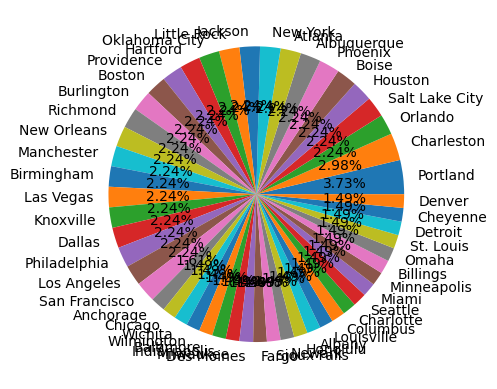

<Figure size 1000x1000 with 0 Axes>

In [ ]:
plt.pie(city_values,labels = city_names,autopct = '%1.2f%%')
plt.figure(figsize=(10, 10))

In [ ]:
corr=df.corr()
corr

,Retailer ID,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin
Retailer ID,1.000000,-0.245190,0.057611,-0.028029,0.018620,0.249740
Price per Unit,-0.245190,1.000000,0.252120,0.446524,0.423122,-0.029323
Units Sold,0.057611,0.252120,1.000000,0.928528,0.925894,-0.438100
Total Sales,-0.028029,0.446524,0.928528,1.000000,0.980412,-0.453377
Operating Profit,0.018620,0.423122,0.925894,0.980412,1.000000,-0.347239
Operating Margin,0.249740,-0.029323,-0.438100,-0.453377,-0.347239,1.000000


In [ ]:
df['Units Sold'] = df['Units Sold'].astype(int)
df['Total Sales'] = df['Total Sales'].astype(int)
df['Operating Profit'] = df['Operating Profit'].astype(int)

<Axes: >

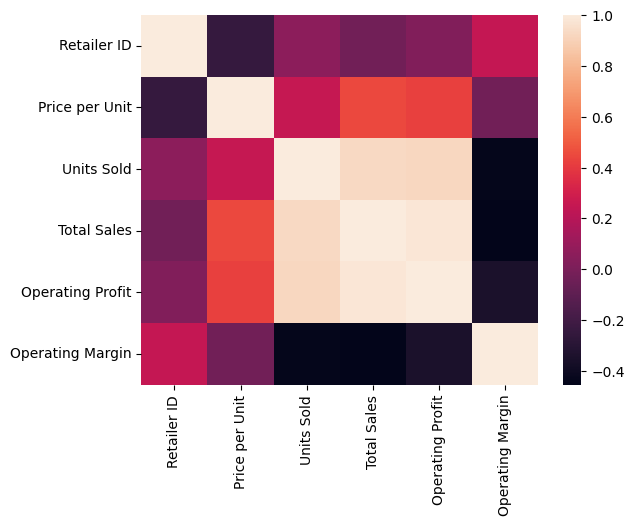

In [ ]:
sns.heatmap(df.corr())

#Automated EDA

In [ ]:
encoded_df

,Retailer,Retailer ID,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Region_Midwest,Region_Northeast,Region_South,...,City_San Francisco,City_Seattle,City_Sioux Falls,City_St. Louis,City_Wichita,City_Wilmington,Product_Men's Street Footwear,Sales Method_In-store,Sales Method_Online,Sales Method_Outlet
Invoice Date,,,,,,,,,,,,,,,,,,,,,
2020-01-01,Foot Locker,1185732,50,1200,600000,300000.00,0.50,0,1,0,...,0,0,0,0,0,0,1,1,0,0
2020-01-01,Foot Locker,1185732,47,336,15792,9633.12,0.61,0,1,0,...,0,0,0,0,0,0,1,0,1,0
2020-01-01,Foot Locker,1185732,34,384,13056,6789.12,0.52,0,1,0,...,0,0,0,0,0,0,1,0,0,1
2020-01-02,West Gear,1128299,32,122,3904,1991.04,0.51,0,1,0,...,0,0,0,0,0,0,1,0,1,0
2020-01-02,West Gear,1128299,35,450,157500,63000.00,0.40,0,1,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,Amazon,1185732,55,450,247500,86625.00,0.35,0,1,0,...,0,0,0,0,0,0,1,0,0,1
2021-12-27,Amazon,1185732,53,122,6466,3103.68,0.48,0,1,0,...,0,0,0,0,0,0,1,0,1,0
2021-12-27,Foot Locker,1185732,67,124,8308,5732.52,0.69,0,1,0,...,0,0,0,0,0,0,1,0,1,0


In [ ]:
report = ProfileReport(df, title = "Pandas Profiling Report", explorative = True)
report.to_file('output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
import dtale
import dtale.app as dtale_app
dtale.app.USE_COLAB = True

In [ ]:
dtale.show(df)

https://t05ovb2irqa-496ff2e9c6d22116-40000-colab.googleusercontent.com/dtale/main/3

In [ ]:
encoded_df

,Retailer,Retailer ID,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Region_Midwest,Region_Northeast,Region_South,...,City_San Francisco,City_Seattle,City_Sioux Falls,City_St. Louis,City_Wichita,City_Wilmington,Product_Men's Street Footwear,Sales Method_In-store,Sales Method_Online,Sales Method_Outlet
Invoice Date,,,,,,,,,,,,,,,,,,,,,
2020-01-01,Foot Locker,1185732,50,1200,600000,300000.00,0.50,0,1,0,...,0,0,0,0,0,0,1,1,0,0
2020-01-01,Foot Locker,1185732,47,336,15792,9633.12,0.61,0,1,0,...,0,0,0,0,0,0,1,0,1,0
2020-01-01,Foot Locker,1185732,34,384,13056,6789.12,0.52,0,1,0,...,0,0,0,0,0,0,1,0,0,1
2020-01-02,West Gear,1128299,32,122,3904,1991.04,0.51,0,1,0,...,0,0,0,0,0,0,1,0,1,0
2020-01-02,West Gear,1128299,35,450,157500,63000.00,0.40,0,1,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,Amazon,1185732,55,450,247500,86625.00,0.35,0,1,0,...,0,0,0,0,0,0,1,0,0,1
2021-12-27,Amazon,1185732,53,122,6466,3103.68,0.48,0,1,0,...,0,0,0,0,0,0,1,0,1,0
2021-12-27,Foot Locker,1185732,67,124,8308,5732.52,0.69,0,1,0,...,0,0,0,0,0,0,1,0,1,0


In [ ]:
encoded_df = encoded_df.resample(rule = 'W').mean()

In [ ]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC')

    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val

    print(out.to_string())

    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [ ]:
adf_test(encoded_df['Total Sales'].iloc[:80])

Augmented Dickey-Fuller Test: 
ADF test statistic      -4.228627
p-value                  0.000589
# lags used              0.000000
# observations          79.000000
critical value (1%)     -3.515977
critical value (5%)     -2.898886
critical value (10%)    -2.586694
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [ ]:
encoded_df = encoded_df.iloc[:80]

In [ ]:
from statsmodels.tsa.statespace.tools import diff

In [ ]:
encoded_df['Total Sales(1)'] = diff(encoded_df['Total Sales'],k_diff=1)

In [ ]:
adf_test(encoded_df['Total Sales(1)'])

Augmented Dickey-Fuller Test: 
ADF test statistic     -5.733510e+00
p-value                 6.517718e-07
# lags used             8.000000e+00
# observations          7.000000e+01
critical value (1%)    -3.527426e+00
critical value (5%)    -2.903811e+00
critical value (10%)   -2.589320e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [ ]:
encoded_df['Total Sales(1)']

Invoice Date
2020-01-05             NaN
2020-01-12     8579.500000
2020-01-19   -54325.166667
2020-01-26    61457.555556
2020-02-02    29847.611111
                  ...     
2021-06-13    34056.574303
2021-06-20    -9975.334915
2021-06-27   -11713.299539
2021-07-04    38208.246753
2021-07-11    11977.209596
Freq: W-SUN, Name: Total Sales(1), Length: 80, dtype: float64

#Seasonal Decomposition

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

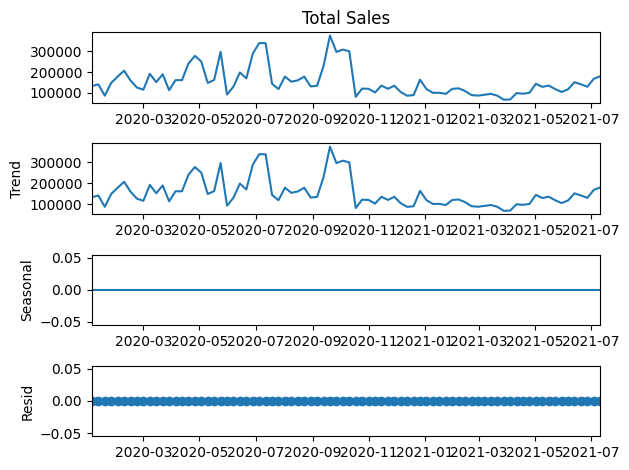

In [ ]:
result = seasonal_decompose(encoded_df['Total Sales'], model = 'additive',period = 1)
result.plot();

#SMA

In [ ]:
encoded_df['2-week-SMA'] = encoded_df['Total Sales'].rolling(window = 2).mean()
encoded_df['3-week-SMA'] = encoded_df['Total Sales'].rolling(window = 3).mean()

In [ ]:
encoded_df['2-week-SMA']

Invoice Date
2020-01-05              NaN
2020-01-12    136709.416667
2020-01-19    113836.583333
2020-01-26    117402.777778
2020-02-02    163055.361111
                  ...      
2021-06-13    134169.918731
2021-06-20    146210.538425
2021-06-27    135366.221198
2021-07-04    148613.694805
2021-07-11    173706.422980
Freq: W-SUN, Name: 2-week-SMA, Length: 80, dtype: float64

In [ ]:
encoded_df['3-week-SMA']

Invoice Date
2020-01-05              NaN
2020-01-12              NaN
2020-01-19    120030.944444
2020-01-26    125268.240741
2020-02-02    137594.907407
                  ...      
2021-06-13    124292.906605
2021-06-20    136520.902810
2021-06-27    140643.549426
2021-07-04    146150.086859
2021-07-11    158974.139129
Freq: W-SUN, Name: 3-week-SMA, Length: 80, dtype: float64

<Axes: xlabel='Invoice Date'>

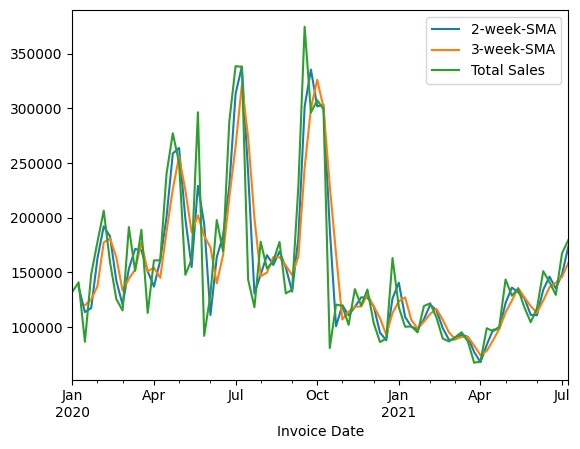

In [ ]:
encoded_df['2-week-SMA'].plot(legend = True)
encoded_df['3-week-SMA'].plot(legend = True)
encoded_df['Total Sales'].plot(legend = True)

In [ ]:
encoded_df['6-week-SMA'] = encoded_df['Total Sales'].rolling(window = 6).mean()
encoded_df['12-week-SMA'] = encoded_df['Total Sales'].rolling(window = 12).mean()

<Axes: xlabel='Invoice Date'>

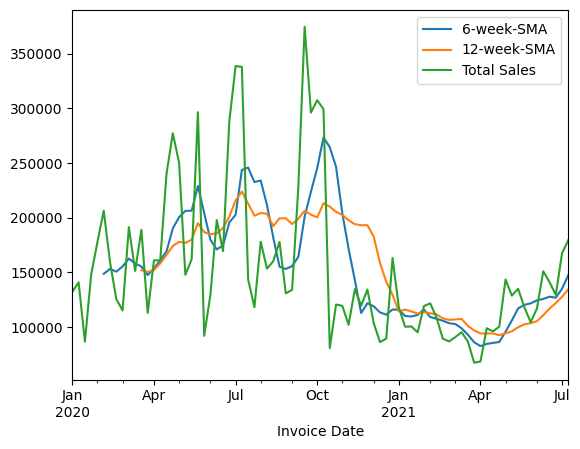

In [ ]:
encoded_df['6-week-SMA'].plot(legend = True)
encoded_df['12-week-SMA'].plot(legend = True)
encoded_df['Total Sales'].plot(legend = True)

#EWMA

EWMA will allow us to reduce the lag effect from SMA and it will put more weight on values that occured more recently (by applying more weight to the more recent values, thus the name). The amount of weight applied to the most recent values will depend on the actual parameters used in the EWMA and the number of periods given a window size.


The formula for EWMA is:
### $y_t =   \frac{\sum\limits_{i=0}^t w_i x_{t-i}}{\sum\limits_{i=0}^t w_i}$

Where $x_t$ is the input value, $w_i$ is the applied weight (Note how it can change from $i=0$ to $t$), and $y_t$ is the output.

Now the question is, how to we define the weight term $w_i$?

This depends on the <tt>adjust</tt> parameter you provide to the <tt>.ewm()</tt> method.

When <tt>adjust=True</tt> (default) is used, weighted averages are calculated using weights equal to $w_i = (1 - \alpha)^i$

which gives

### $y_t = \frac{x_t + (1 - \alpha)x_{t-1} + (1 - \alpha)^2 x_{t-2} + ...
+ (1 - \alpha)^t x_{0}}{1 + (1 - \alpha) + (1 - \alpha)^2 + ...
+ (1 - \alpha)^t}$

In [ ]:
encoded_df['EWMA'] = encoded_df['Total Sales'].ewm(span = 2).mean()

In [ ]:
encoded_df['EWMA']

Invoice Date
2020-01-05    132419.666667
2020-01-12    138854.291667
2020-01-19    102729.474359
2020-01-26    133375.879167
2020-02-02    163234.278237
                  ...      
2021-06-13    139132.096505
2021-06-20    140525.946147
2021-06-27    133181.696335
2021-07-04    156205.777566
2021-07-11    171865.277707
Freq: W-SUN, Name: EWMA, Length: 80, dtype: float64

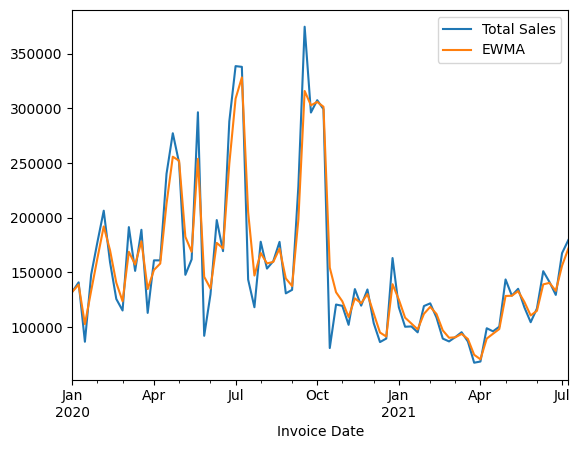

In [ ]:
encoded_df['Total Sales'].plot(legend = True)
encoded_df['EWMA'].plot(legend = True);


#Evaluation Metrics

SMA

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [ ]:
mean_absolute_error(encoded_df['Total Sales'][2:],encoded_df['3-week-SMA'][2:])

27539.72738928046

In [ ]:
mean_squared_error(encoded_df['Total Sales'][2:],encoded_df['3-week-SMA'][2:])

1737067144.8603878

In [ ]:
np.sqrt(mean_squared_error(encoded_df['Total Sales'][2:],encoded_df['3-week-SMA'][2:]))

41678.13749269979

In [ ]:
mean_absolute_error(encoded_df['Total Sales'][1:],encoded_df['2-week-SMA'][1:])

19333.90241773287

In [ ]:
mean_squared_error(encoded_df['Total Sales'][1:],encoded_df['2-week-SMA'][1:])

891325912.2097806

In [ ]:
np.sqrt(mean_squared_error(encoded_df['Total Sales'][1:],encoded_df['2-week-SMA'][1:]))

29855.08184898813

EWMA Evaluation

In [ ]:
encoded_df['EWMA']

Invoice Date
2020-01-05    132419.666667
2020-01-12    138854.291667
2020-01-19    102729.474359
2020-01-26    133375.879167
2020-02-02    163234.278237
                  ...      
2021-06-13    139132.096505
2021-06-20    140525.946147
2021-06-27    133181.696335
2021-07-04    156205.777566
2021-07-11    171865.277707
Freq: W-SUN, Name: EWMA, Length: 80, dtype: float64

In [ ]:
train_data = encoded_df[:70]
test_data = encoded_df[70:]

In [ ]:
mean_absolute_error(test_data['Total Sales'][:6],encoded_df['EWMA']['2021-05-09': '2021-06-13'])

4593.356556280448

In [ ]:
mean_squared_error(test_data['Total Sales'][:6],encoded_df['EWMA']['2021-05-09':'2021-06-13'])

36225502.863403894

In [ ]:
np.sqrt(mean_squared_error(test_data['Total Sales'][:6],encoded_df['EWMA']['2021-05-09':'2021-06-13']))

6018.762569117002

In [ ]:
encoded_df['Total Sales'].mean()

153887.05718829017

#Holt Winters Method

In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [ ]:
span = 2
alpha = 2 / (span + 1)

In [ ]:
encoded_df['EWMA'] = encoded_df['Total Sales'].ewm(alpha = alpha, adjust = False).mean()

In [ ]:
encoded_df['EWMA']

Invoice Date
2020-01-05    132419.666667
2020-01-12    138139.333333
2020-01-19    103829.111111
2020-01-26    133364.074074
2020-02-02    163107.469136
                  ...      
2021-06-13    139132.096505
2021-06-20    140525.946147
2021-06-27    133181.696335
2021-07-04    156205.777566
2021-07-11    171865.277707
Freq: W-SUN, Name: EWMA, Length: 80, dtype: float64

In [ ]:
model = SimpleExpSmoothing(encoded_df['Total Sales'])

In [ ]:
encoded_df['Total Sales']

Invoice Date
2020-01-05    132419.666667
2020-01-12    140999.166667
2020-01-19     86674.000000
2020-01-26    148131.555556
2020-02-02    177979.166667
                  ...      
2021-06-13    151198.205882
2021-06-20    141222.870968
2021-06-27    129509.571429
2021-07-04    167717.818182
2021-07-11    179695.027778
Freq: W-SUN, Name: Total Sales, Length: 80, dtype: float64

In [ ]:
fitted_model = model.fit(smoothing_level = alpha, optimized = False)

In [ ]:
encoded_df['SES7'] = fitted_model.fittedvalues.shift(-1)

In [ ]:
encoded_df['SES7']

Invoice Date
2020-01-05    132419.666667
2020-01-12    138139.333333
2020-01-19    103829.111111
2020-01-26    133364.074074
2020-02-02    163107.469136
                  ...      
2021-06-13    139132.096505
2021-06-20    140525.946147
2021-06-27    133181.696335
2021-07-04    156205.777566
2021-07-11              NaN
Freq: W-SUN, Name: SES7, Length: 80, dtype: float64

Double Exponential Smoothing

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [ ]:
encoded_df['DES7'] = ExponentialSmoothing(encoded_df['Total Sales'], trend = 'add').fit().fittedvalues.shift(-1)

<Axes: xlabel='Invoice Date'>

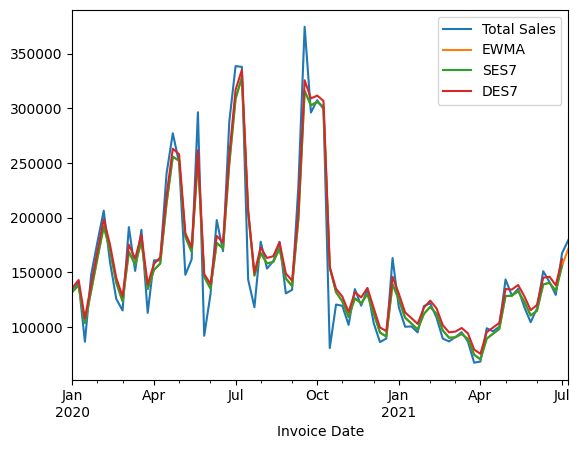

In [ ]:
encoded_df[['Total Sales','EWMA', 'SES7', 'DES7']].plot()


In [ ]:
train_data = encoded_df.iloc[:70]
test_data = encoded_df.iloc[70:]

In [ ]:
test_predictions = fitted_model.forecast(6)

In [ ]:
test_predictions

2021-07-18    171865.277707
2021-07-25    171865.277707
2021-08-01    171865.277707
2021-08-08    171865.277707
2021-08-15    171865.277707
2021-08-22    171865.277707
Freq: W-SUN, dtype: float64

Triple Exponential Smoothing

In [ ]:
encoded_df['TES7'] = ExponentialSmoothing(encoded_df['Total Sales'], trend = 'add', seasonal_periods = 1).fit().fittedvalues.shift(-1)

<Axes: xlabel='Invoice Date'>

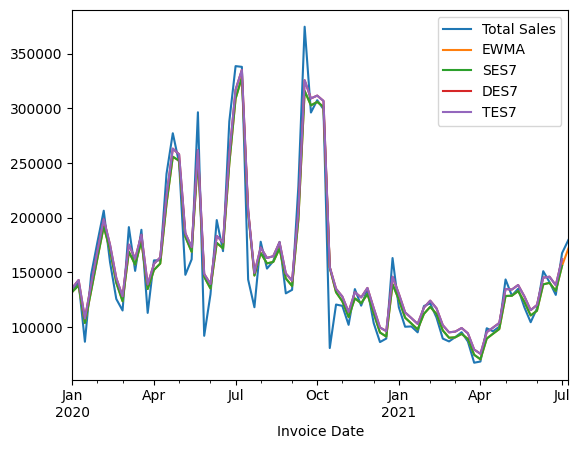

In [ ]:
encoded_df[['Total Sales','EWMA', 'SES7', 'DES7', 'TES7']].plot()

#Evaluation Metrics

Triple Exponential Smoothing

In [ ]:
fitted_model  =  ExponentialSmoothing(train_data['Total Sales'], trend = 'add', seasonal_periods = 1).fit()

In [ ]:
test_predictions = fitted_model.forecast(6)

In [ ]:
test_predictions

2021-05-09    134926.842010
2021-05-16    138597.188603
2021-05-23    142267.535196
2021-05-30    145937.881789
2021-06-06    149608.228382
2021-06-13    153278.574974
Freq: W-SUN, dtype: float64

In [ ]:
 train_data['Total Sales']


Invoice Date
2020-01-05    132419.666667
2020-01-12    140999.166667
2020-01-19     86674.000000
2020-01-26    148131.555556
2020-02-02    177979.166667
                  ...      
2021-04-04     68589.700000
2021-04-11     99028.388889
2021-04-18     96200.333333
2021-04-25    100457.500000
2021-05-02    143644.818182
Freq: W-SUN, Name: Total Sales, Length: 70, dtype: float64

In [ ]:
test_predictions

2021-05-09    134926.842010
2021-05-16    138597.188603
2021-05-23    142267.535196
2021-05-30    145937.881789
2021-06-06    149608.228382
2021-06-13    153278.574974
Freq: W-SUN, dtype: float64

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [ ]:
test_data['Total Sales'][:6]

Invoice Date
2021-05-09    128849.333333
2021-05-16    135091.891892
2021-05-23    118119.225806
2021-05-30    104538.882353
2021-06-06    117141.631579
2021-06-13    151198.205882
Freq: W-SUN, Name: Total Sales, dtype: float64

In [ ]:
mean_absolute_error(test_data['Total Sales'][:6],test_predictions)

18279.51335128293

In [ ]:
np.sqrt(mean_squared_error(test_data['Total Sales'][:6],test_predictions))

23821.030837262864

EWMA Evaluation

In [ ]:
encoded_df['EWMA']

Invoice Date
2020-01-05    132419.666667
2020-01-12    138139.333333
2020-01-19    103829.111111
2020-01-26    133364.074074
2020-02-02    163107.469136
                  ...      
2021-06-13    139132.096505
2021-06-20    140525.946147
2021-06-27    133181.696335
2021-07-04    156205.777566
2021-07-11    171865.277707
Freq: W-SUN, Name: EWMA, Length: 80, dtype: float64

In [ ]:
mean_absolute_error(test_data['Total Sales'][:6],encoded_df['EWMA']['2021-05-09': '2021-06-13'])

4593.356556280448

In [ ]:
mean_squared_error(test_data['Total Sales'][:6],encoded_df['EWMA']['2021-05-09':'2021-06-13'])

36225502.86340391

In [ ]:
np.sqrt(mean_squared_error(test_data['Total Sales'][:6],encoded_df['EWMA']['2021-05-09':'2021-06-13']))

6018.762569117003

In [ ]:
encoded_df['Total Sales'].mean()

153887.05718829017

SES Evaluation

In [ ]:
mean_absolute_error(test_data['Total Sales'][:6],encoded_df['SES7']['2021-05-09':'2021-06-13'])

4593.356556280448

In [ ]:
mean_squared_error(test_data['Total Sales'][:6],encoded_df['SES7']['2021-05-09':'2021-06-13'])

36225502.86340391

In [ ]:
np.sqrt(mean_squared_error(test_data['Total Sales'][:6],encoded_df['SES7']['2021-05-09':'2021-06-13']))

6018.762569117003

In [ ]:
encoded_df['Total Sales'].mean()

153887.05718829017

DES Evaluation


In [ ]:
mean_absolute_error(test_data['Total Sales'][:6],encoded_df['DES7']['2021-05-09':'2021-06-13'])

6532.531217444873

In [ ]:
mean_squared_error(test_data['Total Sales'][:6],encoded_df['DES7']['2021-05-09':'2021-06-13'])

51739458.93659874

In [ ]:
np.sqrt(mean_squared_error(test_data['Total Sales'][:6],encoded_df['DES7']['2021-05-09':'2021-06-13']))

7193.0145931034185

In [ ]:
encoded_df['Total Sales'].mean()

153887.05718829017

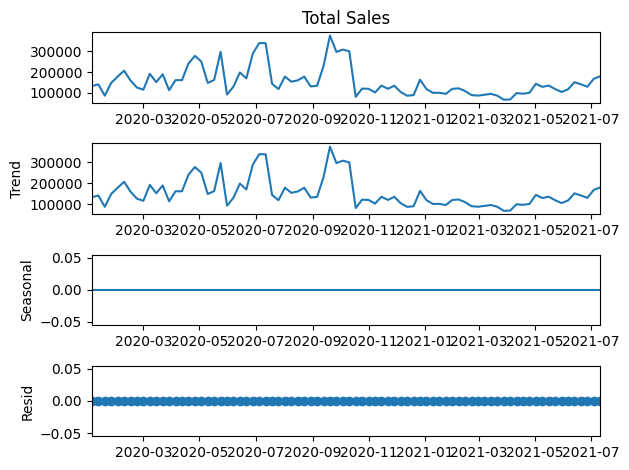

In [ ]:
result.plot();

In [ ]:
len(encoded_df)

80

<Axes: xlabel='Invoice Date'>

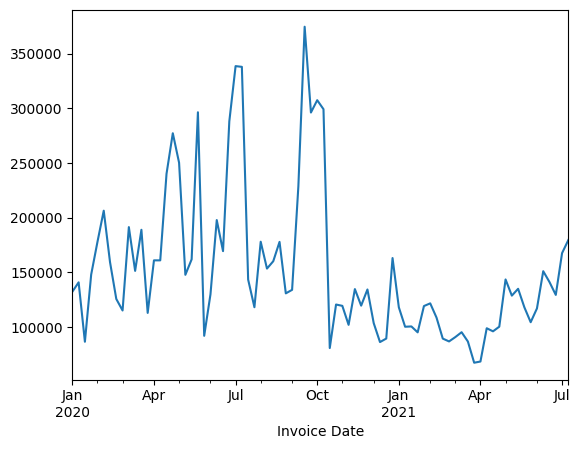

In [ ]:
encoded_df['Total Sales'].plot()

#AR,ARIMA

AR(1)

In [ ]:
len(encoded_df)

80

In [ ]:
train_data = encoded_df.iloc[:70]
test_data = encoded_df.iloc[70:]

In [ ]:
model = AutoReg(train_data['Total Sales'], lags=1)
AR1fit = model.fit()

In [ ]:
start=len(train_data)
end=len(train_data)+len(test_data)-1
predictions1 = AR1fit.predict(start=start, end=end, dynamic=False).rename('AR(1) Predictions')

In [ ]:
predictions1

2021-05-09    148676.027343
2021-05-16    151792.607055
2021-05-23    153723.170623
2021-05-30    154919.057149
2021-06-06    155659.848392
2021-06-13    156118.731115
2021-06-20    156402.985762
2021-06-27    156579.067145
2021-07-04    156688.140659
2021-07-11    156755.706187
Freq: W-SUN, Name: AR(1) Predictions, dtype: float64

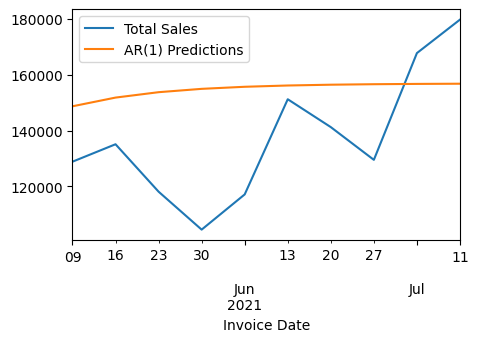

In [ ]:
test_data['Total Sales'].plot(legend=True)
predictions1.plot(legend=True,figsize=(5,3));

AR(2) Model

In [ ]:
model = AutoReg(train_data['Total Sales'], lags=2)
AR2fit = model.fit()

In [ ]:
start=len(train_data)
end=len(train_data)+len(test_data)-1
predictions2 = AR2fit.predict(start=start, end=end, dynamic=False).rename('AR(2) Predictions')

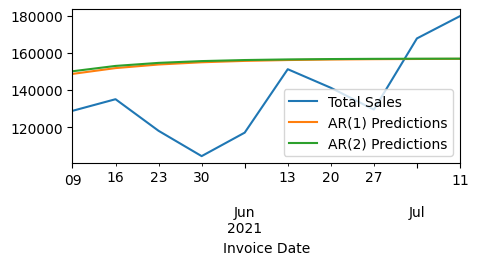

In [ ]:
test_data['Total Sales'].plot(legend=True)
predictions1.plot(legend=True)
predictions2.plot(legend=True,figsize=(5,2));

AR(p) model where statsmodels chooses p

In [ ]:
for i in range(1,10):
  model = AutoReg(train_data['Total Sales'], lags=i)
  ARfit = model.fit()
  predictions = ARfit.predict(start=start, end=end, dynamic=False)
  error = np.sqrt(mean_squared_error(test_data['Total Sales'], predictions))
  print(f'Lag {i} Error : {error}')
  min_error = float('inf')
  min_error = min(min_error, error)

print(min_error)



Lag 1 Error : 27562.182281306184
Lag 2 Error : 28054.85982857553
Lag 3 Error : 27606.236530963688
Lag 4 Error : 29956.68350939235
Lag 5 Error : 24528.36297823624
Lag 6 Error : 19355.5105386068
Lag 7 Error : 18596.15290693687
Lag 8 Error : 26224.980031687854
Lag 9 Error : 19201.50116307877
19201.50116307877


In [ ]:
model = AutoReg(train_data['Total Sales'], lags=9)
AR9fit = model.fit()

In [ ]:
start=len(train_data)
end=len(train_data)+len(test_data)-1
predictions9 = AR9fit.predict(start=start, end=end, dynamic=False).rename('AR(9)')

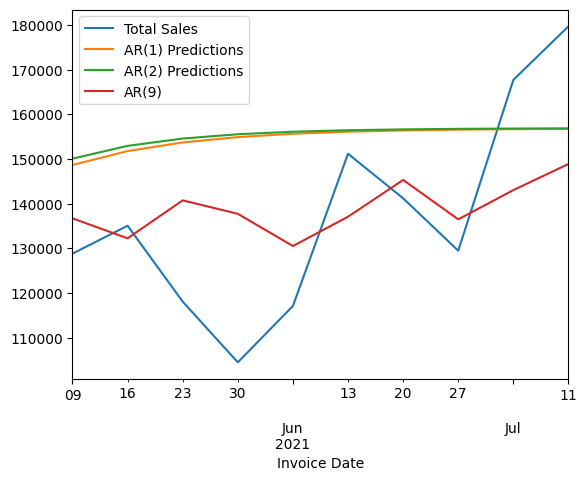

In [ ]:
test_data['Total Sales'].plot(legend=True)
predictions1.plot(legend=True)
predictions2.plot(legend=True);
predictions9.plot(legend=True);

Evaluation

In [ ]:
from sklearn.metrics import mean_squared_error

labels = ['AR(1)','AR(2)','AR(9)']
preds = [predictions1, predictions2, predictions9]

for i in range(3):
    error = np.sqrt(mean_squared_error(test_data['Total Sales'], preds[i]))
    print(f'{labels[i]} Error: {error}')

AR(1) Error: 27562.182281306184
AR(2) Error: 28054.85982857553
AR(9) Error: 19201.50116307877


Forecast

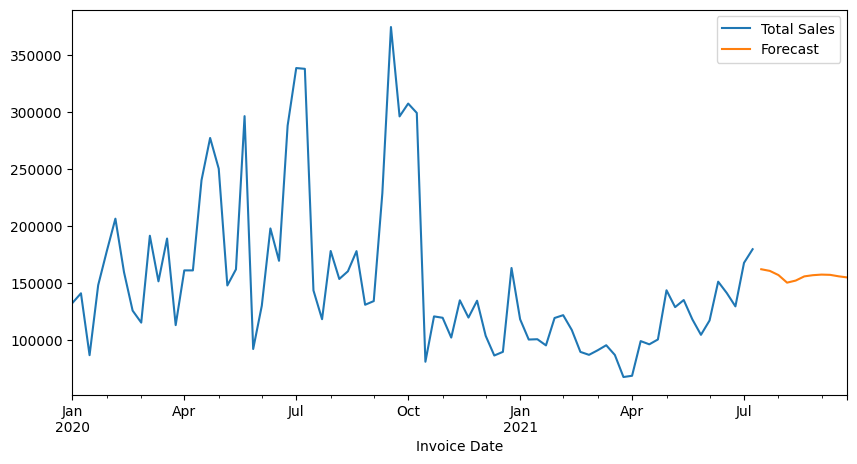

In [ ]:
model = AutoReg(encoded_df['Total Sales'], lags = 7)
ARfit = model.fit()
fcast = ARfit.predict(start=len(encoded_df), end=len(encoded_df)+ 10, dynamic=False).rename('Forecast')
encoded_df['Total Sales'].plot(legend=True)
fcast.plot(legend=True,figsize=(10,5));

In [ ]:
fcast

2021-07-18    162113.260656
2021-07-25    160652.131125
2021-08-01    157002.708717
2021-08-08    150343.259642
2021-08-15    152165.762840
2021-08-22    155839.554922
2021-08-29    156894.608308
2021-09-05    157406.004022
2021-09-12    157190.315243
2021-09-19    155889.212770
2021-09-26    154909.600981
Freq: W-SUN, Name: Forecast, dtype: float64

ARIMA

In [ ]:
auto_arima(encoded_df['Total Sales'], seasonal = True).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   80
Model:               SARIMAX(0, 1, 2)   Log Likelihood                -974.476
Date:                Mon, 07 Aug 2023   AIC                           1954.952
Time:                        08:18:33   BIC                           1962.060
Sample:                    01-05-2020   HQIC                          1957.800
                         - 07-11-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3108      0.109     -2.861      0.004      -0.524      -0.098
ma.L2         -0.4139      0.106     -3.899      0.000      -0.622      -0.206
sigma2      3.284e+09   7.78e-12   4.22e+20      0.000    3.28e+09    3.28e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                19.21
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               0.09   Skew:                            -0.41
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.22e+36. Standard errors may be unstable.
"""

In [ ]:
model2 = ARIMA(encoded_df['Total Sales'], order = (0,1,2))

In [ ]:
results = model2.fit()

In [ ]:
len(encoded_df)

80

In [ ]:
train_data = encoded_df[:70]
test_data = encoded_df[70:]

In [ ]:
start = len(train_data)
end = len(train_data) + len(test_data) - 1

In [ ]:
predictions = results.predict(start,end).rename('ARIMA Model')

<Axes: xlabel='Invoice Date'>

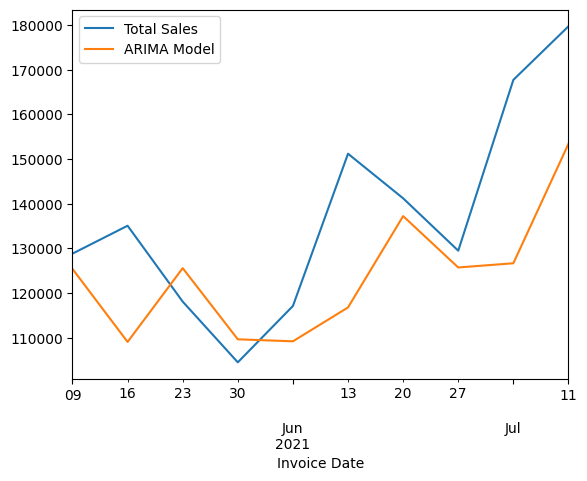

In [ ]:
test_data['Total Sales'].plot(legend = True)
predictions.plot(legend = True)

In [ ]:
from statsmodels.tools.eval_measures import rmse

In [ ]:
error = rmse(test_data['Total Sales'],predictions)
error

21018.062341894103

In [ ]:
test_data['Total Sales'].mean()

137308.44592018274

In [ ]:
fcast = results.predict(len(encoded_df),len(encoded_df)+10).rename(' ARIMA Forecast')

In [ ]:
fcast

2021-07-18    154548.456503
2021-07-25    143671.043515
2021-08-01    143671.043515
2021-08-08    143671.043515
2021-08-15    143671.043515
2021-08-22    143671.043515
2021-08-29    143671.043515
2021-09-05    143671.043515
2021-09-12    143671.043515
2021-09-19    143671.043515
2021-09-26    143671.043515
Freq: W-SUN, Name:  ARIMA Forecast, dtype: float64

<Axes: xlabel='Invoice Date'>

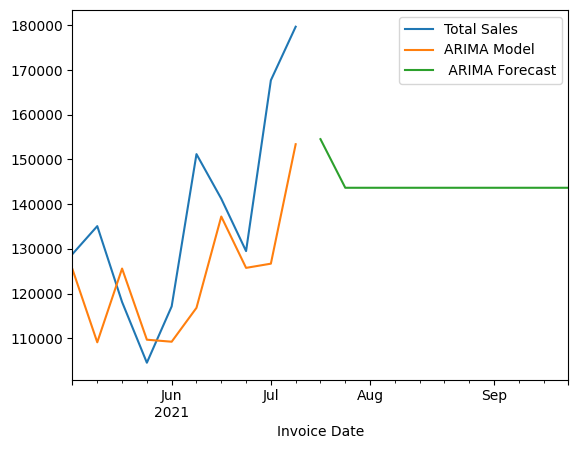

In [ ]:
test_data['Total Sales'].plot(legend = True)
predictions.plot(legend = True)
fcast.plot(legend = True)

#ARIMAX

In [ ]:
train_data = encoded_df[:70]
test_data = encoded_df[70:]

In [ ]:
model2 = ARIMA(endog = train_data['Total Sales'],exog = train_data.iloc[:, 7:57],  order = (0,1,2))

In [ ]:
results = model2.fit()

In [ ]:
len(encoded_df)

80

In [ ]:
start = len(train_data)
end = len(train_data) + len(test_data) - 1

In [ ]:
predictions = results.predict(start = start, end = end, exog = test_data.iloc[:, 7:57]).rename('ARIMAX Predictions')

<Axes: xlabel='Invoice Date'>

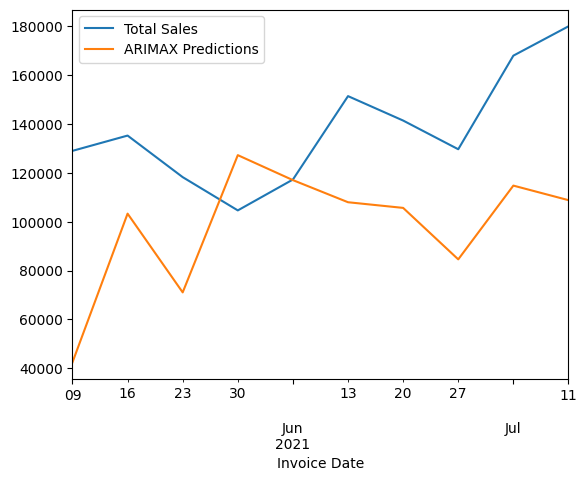

In [ ]:
test_data['Total Sales'].plot(legend = True)
predictions.plot(legend = True)

In [ ]:
from statsmodels.tools.eval_measures import rmse

In [ ]:
test_data['Total Sales']

Invoice Date
2021-05-09    128849.333333
2021-05-16    135091.891892
2021-05-23    118119.225806
2021-05-30    104538.882353
2021-06-06    117141.631579
2021-06-13    151198.205882
2021-06-20    141222.870968
2021-06-27    129509.571429
2021-07-04    167717.818182
2021-07-11    179695.027778
Freq: W-SUN, Name: Total Sales, dtype: float64

In [ ]:
predictions

2021-05-09     42515.925572
2021-05-16    103221.013471
2021-05-23     71067.034079
2021-05-30    127099.580538
2021-06-06    116906.228524
2021-06-13    107873.450553
2021-06-20    105565.241775
2021-06-27     84550.914972
2021-07-04    114664.455686
2021-07-11    108721.993061
Freq: W-SUN, Name: ARIMAX Predictions, dtype: float64

In [ ]:
error = rmse(test_data['Total Sales'],predictions)
error

49207.49141546093

In [ ]:
test_data['Total Sales'].mean()

137308.44592018274

fcast

<Axes: xlabel='Invoice Date'>

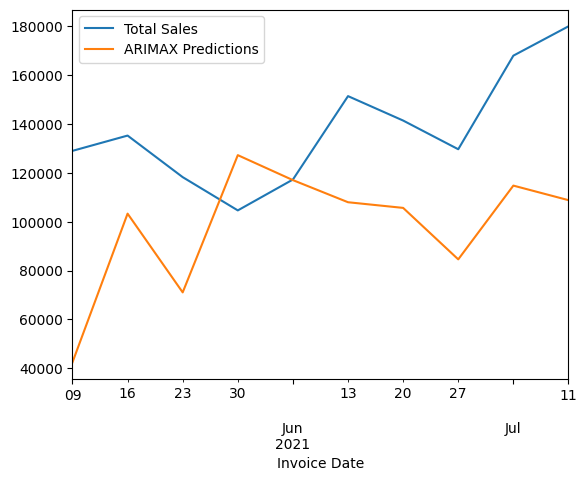

In [ ]:
test_data['Total Sales'].plot(legend = True)
predictions.plot(legend = True)



#SARIMA

In [ ]:
result = seasonal_decompose(encoded_df['Total Sales'], model = 'add', period = 1)

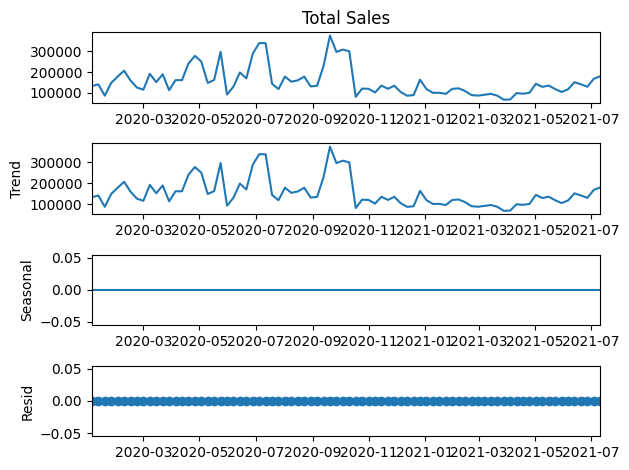

In [ ]:
result.plot();

In [ ]:
model = SARIMAX(train_data['Total Sales'], order = (0,1,2))

In [ ]:
results = model.fit()

In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            Total Sales   No. Observations:                   70
Model:               SARIMAX(0, 1, 2)   Log Likelihood                -855.233
Date:                Mon, 07 Aug 2023   AIC                           1716.466
Time:                        08:18:42   BIC                           1723.169
Sample:                    01-05-2020   HQIC                          1719.125
                         - 05-02-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3196      0.124     -2.571      0.010      -0.563      -0.076
ma.L2         -0.4182      0.123     -3.399      0.001      -0.659      -0.177
sigma2      3.763e+09   7.78e-12   4.84e+20      0.000    3.76e+09    3.76e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 8.61
Prob(Q):                              0.86   Prob(JB):                         0.01
Heteroskedasticity (H):               0.16   Skew:                            -0.29
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

In [ ]:
start = len(train_data)
end = len(train_data) + len(test_data) - 1

In [ ]:
predictions = results.predict(start, end).rename('SARIMA Predictions')


In [ ]:
from statsmodels.tools.eval_measures import rmse

In [ ]:
error = rmse(test_data['Total Sales'],predictions)

In [ ]:
error

37378.031210308865

In [ ]:
test_data['Total Sales'].mean()

137308.44592018274

In [ ]:
test_data.shape

(10, 126)

In [ ]:
test_data.iloc[:, 6:60]

,Region_Midwest,Region_Northeast,Region_South,Region_Southeast,Region_West,State_Alabama,State_Alaska,State_Arizona,State_Arkansas,State_California,...,State_South Carolina,State_South Dakota,State_Tennessee,State_Texas,State_Utah,State_Vermont,State_Virginia,State_Washington,State_West Virginia,State_Wisconsin
Invoice Date,,,,,,,,,,,,,,,,,,,,,
2021-05-09,0.200000,0.333333,0.200000,0.066667,0.200000,0.0,0.000000,0.000000,0.000000,0.100000,...,0.066667,0.000000,0.200000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.066667
2021-05-16,0.270270,0.216216,0.162162,0.081081,0.270270,0.0,0.000000,0.000000,0.000000,0.081081,...,0.000000,0.054054,0.081081,0.0,0.081081,0.081081,0.000000,0.0,0.000000,0.000000
2021-05-23,0.064516,0.225806,0.387097,0.161290,0.161290,0.0,0.064516,0.000000,0.096774,0.096774,...,0.000000,0.000000,0.096774,0.0,0.000000,0.000000,0.000000,0.0,0.064516,0.000000
2021-05-30,0.117647,0.000000,0.000000,0.176471,0.705882,0.0,0.000000,0.176471,0.000000,0.176471,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.176471,0.0,0.000000,0.000000
2021-06-06,0.421053,0.157895,0.000000,0.105263,0.315789,0.0,0.000000,0.000000,0.000000,0.157895,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.105263
2021-06-13,0.352941,0.294118,0.000000,0.147059,0.205882,0.0,0.000000,0.000000,0.000000,0.000000,...,0.058824,0.058824,0.000000,0.0,0.088235,0.088235,0.000000,0.0,0.000000,0.000000
2021-06-20,0.387097,0.322581,0.193548,0.096774,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.064516,0.000000
2021-06-27,0.142857,0.071429,0.214286,0.178571,0.392857,0.0,0.071429,0.107143,0.107143,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.107143,0.0,0.000000,0.000000
2021-07-04,0.545455,0.272727,0.000000,0.181818,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.181818


<Axes: xlabel='Invoice Date'>

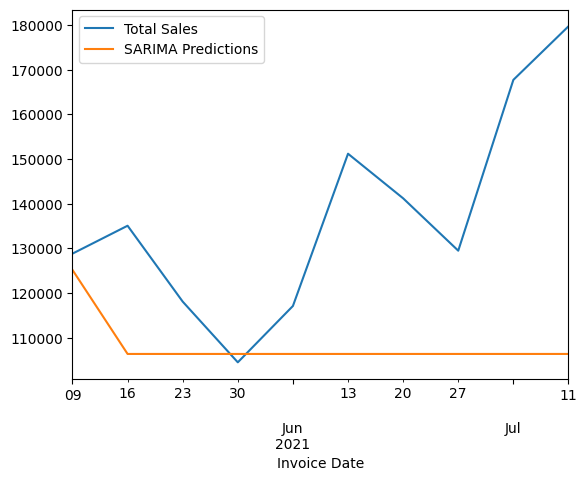

In [ ]:
test_data['Total Sales'].plot(legend = True)
predictions.plot(legend = True)

In [ ]:
fcast = results.predict(len(encoded_df),len(encoded_df)+10, exog = test_data.iloc[:, 6:60]).rename('Forecast')

#SARIMAX

In [ ]:
train = encoded_df[:70]
test = encoded_df[70:]

In [ ]:
encoded_df.columns

Index(['Retailer ID', 'Price per Unit', 'Units Sold', 'Total Sales',
       'Operating Profit', 'Operating Margin', 'Region_Midwest',
       'Region_Northeast', 'Region_South', 'Region_Southeast',
       ...
       'Sales Method_Outlet', 'Total Sales(1)', '2-week-SMA', '3-week-SMA',
       '6-week-SMA', '12-week-SMA', 'EWMA', 'SES7', 'DES7', 'TES7'],
      dtype='object', length=126)

In [ ]:
selected_cols = ['3-week-SMA'	,'6-week-SMA',	'12-week-SMA',	'EWMA',	'SES7'	,'DES7',	'TES7', '2-week-SMA']

In [ ]:
train.drop(selected_cols, axis = 1, inplace = True)

In [ ]:
len(train.columns)

118

In [ ]:
train.columns

Index(['Retailer ID', 'Price per Unit', 'Units Sold', 'Total Sales',
       'Operating Profit', 'Operating Margin', 'Region_Midwest',
       'Region_Northeast', 'Region_South', 'Region_Southeast',
       ...
       'City_Seattle', 'City_Sioux Falls', 'City_St. Louis', 'City_Wichita',
       'City_Wilmington', 'Product_Men's Street Footwear',
       'Sales Method_In-store', 'Sales Method_Online', 'Sales Method_Outlet',
       'Total Sales(1)'],
      dtype='object', length=118)

In [ ]:
model = SARIMAX(train['Total Sales'],exog=train.iloc[: ,7:57],order=(0,1,1),enforce_invertibility=False)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            Total Sales   No. Observations:                   70
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -844.909
Date:                Mon, 07 Aug 2023   AIC                           1793.818
Time:                        08:18:44   BIC                           1909.991
Sample:                    01-05-2020   HQIC                          1839.908
                         - 05-02-2021                                         
Covariance Type:                  opg                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Region_Northeast     -1.317e+05   2.01e+05     -0.657      0.511   -5.25e+05    2.61e+05
Region_South          -6.53e+04   1.21e+05     -0.541      0.589   -3.02e+05    1.71e+05
Region_Southeast      1.374e+05   1.21e+05      1.135      0.257   -9.99e+04    3.75e+05
Region_West          -6551.4801   2.41e+05     -0.027      0.978   -4.79e+05    4.66e+05
State_Alabama         2.863e-09   1.59e-09      1.799      0.072   -2.56e-10    5.98e-09
State_Alaska          3.557e+05   1262.346    281.810      0.000    3.53e+05    3.58e+05
State_Arizona         3.129e+04      0.038   8.18e+05      0.000    3.13e+04    3.13e+04
State_Arkansas       -1.835e+05      0.041  -4.43e+06      0.000   -1.84e+05   -1.84e+05
State_California      5.917e+04   8.32e+04      0.711      0.477   -1.04e+05    2.22e+05
State_Colorado       -1.336e+05   2.87e+04     -4.661      0.000    -1.9e+05   -7.74e+04
State_Connecticut    -2.544e+05   1893.519   -134.371      0.000   -2.58e+05   -2.51e+05
State_Delaware        2.622e+04   1262.346     20.769      0.000    2.37e+04    2.87e+04
State_Florida        -6.078e+04   1.18e+05     -0.515      0.606   -2.92e+05     1.7e+05
State_Georgia         -1.94e+05   1893.519   -102.473      0.000   -1.98e+05    -1.9e+05
State_Hawaii          1.209e+04      9.234   1309.476      0.000    1.21e+04    1.21e+04
State_Idaho          -5.171e+04      0.041  -1.25e+06      0.000   -5.17e+04   -5.17e+04
State_Illinois       -1.433e-09         -0        inf      0.000   -1.43e-09   -1.43e-09
State_Indiana         1.209e+04      9.234   1309.476      0.000    1.21e+04    1.21e+04
State_Iowa            4543.3865   4.72e+05      0.010      0.992    -9.2e+05    9.29e+05
State_Kansas          1.437e+04      9.234   1555.838      0.000    1.43e+04    1.44e+04
State_Kentucky       -1.224e+05      0.028  -4.43e+06      0.000   -1.22e+05   -1.22e+05
State_Louisiana       5.665e+04   1893.519     29.915      0.000    5.29e+04    6.04e+04
State_Maine           1.292e+05   1262.346    102.344      0.000    1.27e+05    1.32e+05
State_Maryland        -1.99e+05      9.234  -2.15e+04      0.000   -1.99e+05   -1.99e+05
State_Massachusetts   2.155e+04     13.851   1555.838      0.000    2.15e+04    2.16e+04
State_Michigan        7.929e+04      0.028   2.87e+06      0.000    7.93e+04    7.93e+04
State_Minnesota       2.667e+04   2.41e+05      0.111      0.912   -4.46e+05    4.99e+05
State_Mississippi     1.189e+05      0.041   2.87e+06      0.000    1.19e+05    1.19e+05
State_Missouri        1.815e+05      9.234   1.97e+04      0.000    1.81e+05    1.82e+05
State_Montana        -1.227e+05    4.7e+05     -0.261      0.794   -1.04e+06    7.99e+05
State_Nebraska                0         -0        nan        nan           0           0
State_Nevada         -1.529e+05   1.68e+05     -0.908      0.364   -4.83e+05    1.77e+05
State_New Hampshire  -6.416e+04      0.041  -1.55e+06      0.000   -6.42e+04   -6.42e+04
State_New Jersey      4.606e+04   126

In [ ]:
start = len(train)
end = len(train) + len(test) - 1

In [ ]:
predictions = results.predict(start = start, end = end, exog = test.iloc[:, 7:57]).rename('SARIMAX Predictions')

In [ ]:
test_data.columns

Index(['Retailer ID', 'Price per Unit', 'Units Sold', 'Total Sales',
       'Operating Profit', 'Operating Margin', 'Region_Midwest',
       'Region_Northeast', 'Region_South', 'Region_Southeast',
       ...
       'Sales Method_Outlet', 'Total Sales(1)', '2-week-SMA', '3-week-SMA',
       '6-week-SMA', '12-week-SMA', 'EWMA', 'SES7', 'DES7', 'TES7'],
      dtype='object', length=126)

In [ ]:
from statsmodels.tools.eval_measures import rmse

In [ ]:
error = rmse(test_data['Total Sales'],predictions)

In [ ]:
test_data['Total Sales']


Invoice Date
2021-05-09    128849.333333
2021-05-16    135091.891892
2021-05-23    118119.225806
2021-05-30    104538.882353
2021-06-06    117141.631579
2021-06-13    151198.205882
2021-06-20    141222.870968
2021-06-27    129509.571429
2021-07-04    167717.818182
2021-07-11    179695.027778
Freq: W-SUN, Name: Total Sales, dtype: float64

In [ ]:
predictions

2021-05-09     42517.300916
2021-05-16    103222.980157
2021-05-23     71069.000766
2021-05-30    127101.547222
2021-06-06    116908.195210
2021-06-13    107875.417239
2021-06-20    105567.208463
2021-06-27     84552.881658
2021-07-04    114666.422373
2021-07-11    108723.959746
Freq: W-SUN, Name: SARIMAX Predictions, dtype: float64

In [ ]:
error

49206.032867651906

In [ ]:
test_data['Total Sales'].mean()

137308.44592018274

<Axes: xlabel='Invoice Date'>

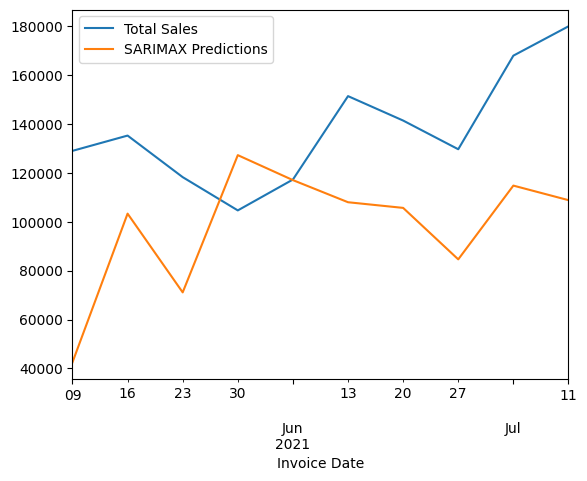

In [ ]:
test_data['Total Sales'].plot(legend=True)
predictions.plot(legend=True)


# VAR, VARIMA



VAR

In [ ]:
transformed_df = encoded_df[['Price per Unit', 'Total Sales']]

In [ ]:
train_data = transformed_df.iloc[:70]
test_data = transformed_df.iloc[70:]

In [ ]:
for i in [1,2,3,4,5,6,7]:
    model = VAR(transformed_df)
    results = model.fit(i)
    print('Order =', i)
    print('AIC: ', results.aic)
    print('BIC: ', results.bic)
    print()

Order = 1
AIC:  25.032589522143912
BIC:  25.212547586888242

Order = 2
AIC:  25.121205307714643
BIC:  25.42334746498254

Order = 3
AIC:  25.17691028620161
BIC:  25.603056726538647

Order = 4
AIC:  25.091516126204937
BIC:  25.643531917325383

Order = 5
AIC:  25.15916460606121
BIC:  25.838961119365194

Order = 6
AIC:  25.151007165441076
BIC:  25.96054354953984

Order = 7
AIC:  25.04474191868206
BIC:  25.986026620523862



## Fit the VAR(1) Model

In [ ]:
results = model.fit(1)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 07, Aug, 2023
Time:                     08:18:46
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    25.2125
Nobs:                     79.0000    HQIC:                   25.1047
Log likelihood:          -1206.98    FPE:                7.43956e+10
AIC:                      25.0326    Det(Omega_mle):     6.90516e+10
--------------------------------------------------------------------
Results for equation Price per Unit
                       coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------
const                    12.842572         4.270483            3.007           0.003
L1.Price per Unit         0.807045         0.140303            5.752           0.000
L1.Total Sales           -0.000025 

In [ ]:
lag_order = results.k_ar
lag_order

1

In [ ]:
z = results.forecast(y=train_data.values[-lag_order:], steps=10)
z

array([[4.63034324e+01, 1.49395050e+05],
       [4.64779790e+01, 1.52621742e+05],
       [4.65382074e+01, 1.54385015e+05],
       [4.65427483e+01, 1.55312958e+05],
       [4.65232227e+01, 1.55773781e+05],
       [4.64959481e+01, 1.55980560e+05],
       [4.64687687e+01, 1.56054584e+05],
       [4.64449837e+01, 1.56063437e+05],
       [4.64255669e+01, 1.56043688e+05],
       [4.64103902e+01, 1.56014303e+05]])

In [ ]:
train_data

,Price per Unit,Total Sales
Invoice Date,,
2020-01-05,37.500000,132419.666667
2020-01-12,37.500000,140999.166667
2020-01-19,39.666667,86674.000000
2020-01-26,50.666667,148131.555556
2020-02-02,48.500000,177979.166667
...,...,...
2021-04-04,24.000000,68589.700000
2021-04-11,33.083333,99028.388889
2021-04-18,37.888889,96200.333333


In [ ]:
test_data

,Price per Unit,Total Sales
Invoice Date,,
2021-05-09,42.533333,128849.333333
2021-05-16,47.459459,135091.891892
2021-05-23,45.774194,118119.225806
2021-05-30,44.764706,104538.882353
2021-06-06,41.315789,117141.631579
2021-06-13,46.264706,151198.205882
2021-06-20,47.806452,141222.870968
2021-06-27,46.071429,129509.571429
2021-07-04,50.272727,167717.818182


In [ ]:
idx = pd.date_range('2021-05-09', periods=10, freq='W')
df_forecast = pd.DataFrame(z, index=idx, columns=['Price Per Unit','Total Sales'])
df_forecast

,Price Per Unit,Total Sales
2021-05-09,46.303432,149395.050355
2021-05-16,46.477979,152621.742269
2021-05-23,46.538207,154385.014937
2021-05-30,46.542748,155312.957574
2021-06-06,46.523223,155773.781487
2021-06-13,46.495948,155980.559699
2021-06-20,46.468769,156054.584331
2021-06-27,46.444984,156063.437139
2021-07-04,46.425567,156043.687899
2021-07-11,46.410390,156014.302833


## Plot the results
The VARResults object offers a couple of quick plotting tools:

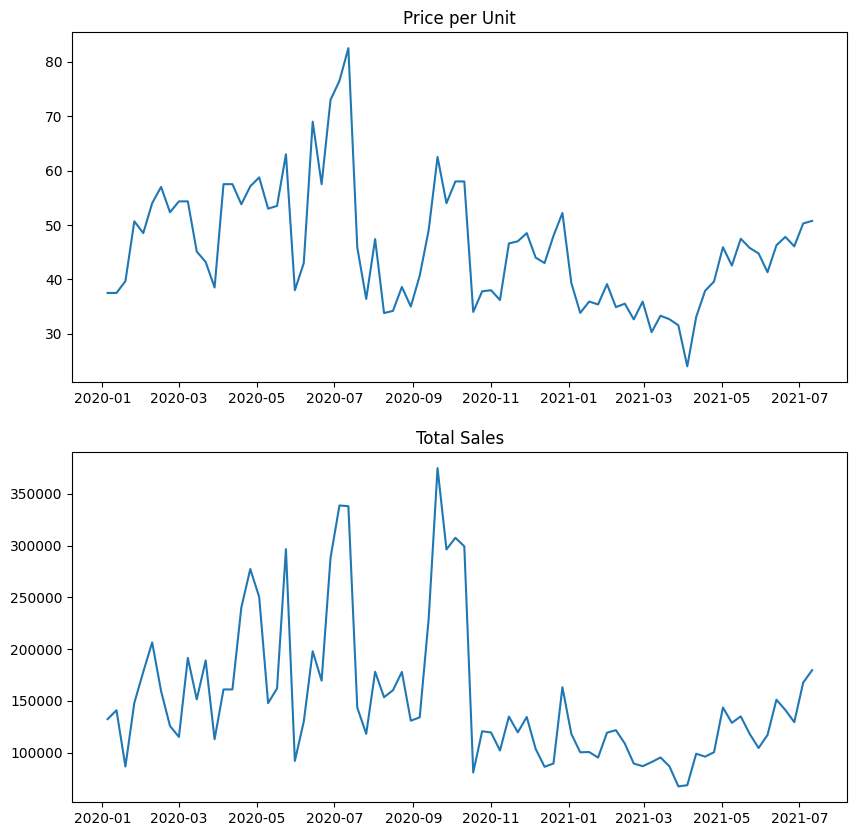

In [ ]:
results.plot();

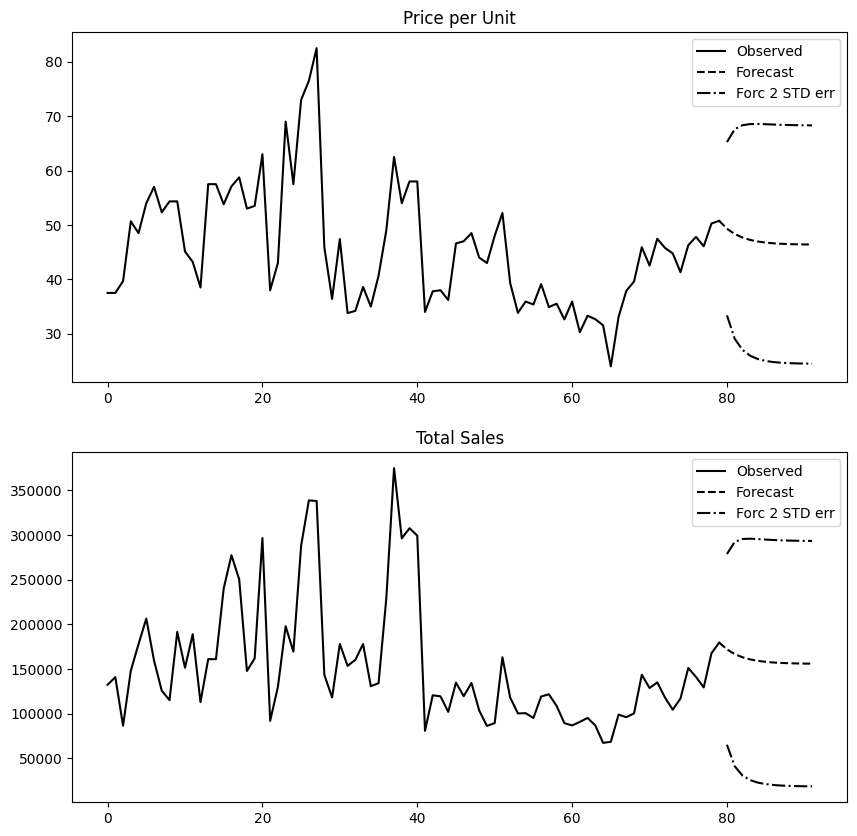

In [ ]:
results.plot_forecast(12);

But for our investigation we want to plot predicted values against our test set.

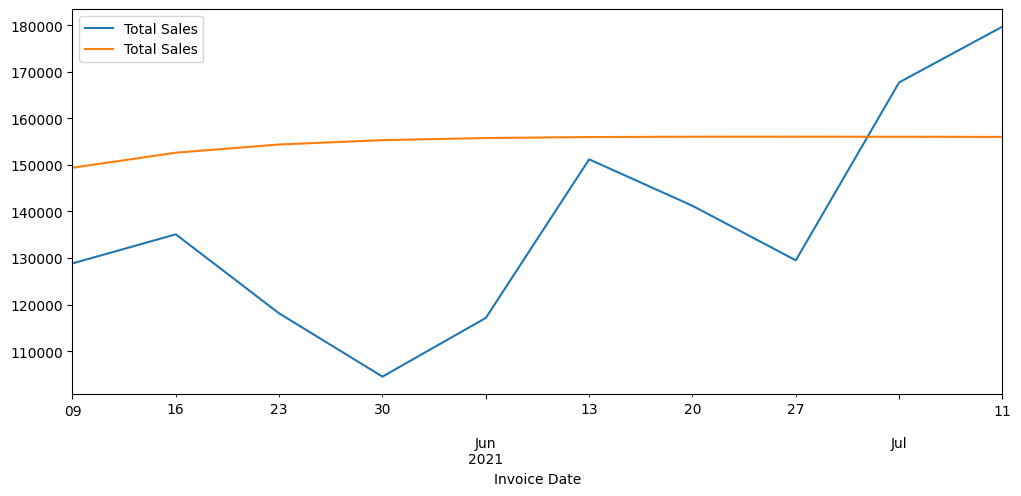

In [ ]:
test_data['Total Sales']['2021-05-09': '2021-07-11'].plot(figsize=(12,5),legend=True)
df_forecast['Total Sales'].plot(legend=True);

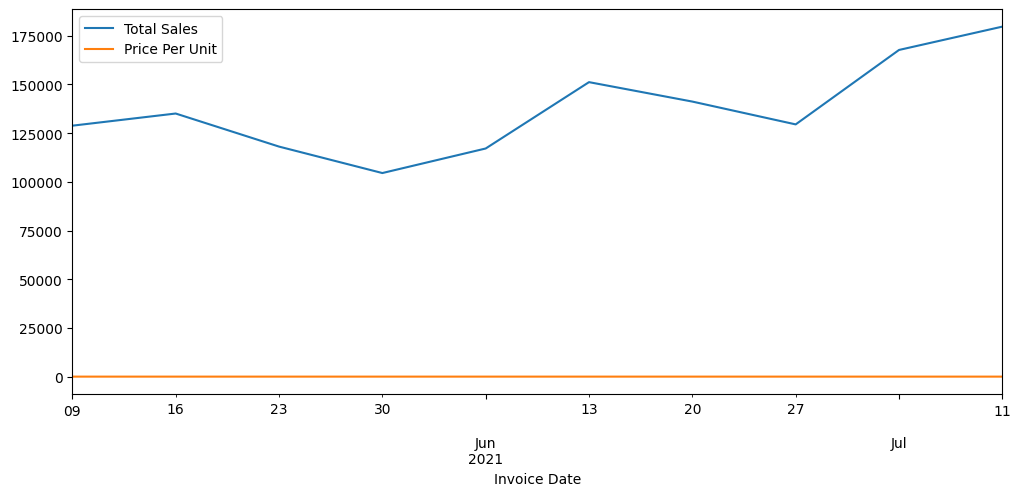

In [ ]:
test_data['Total Sales']['2021-05-09': '2021-07-11'].plot(figsize=(12,5),legend=True)
df_forecast['Price Per Unit'].plot(legend=True);

### Evaluate the model

&nbsp;&nbsp;&nbsp;&nbsp;$RMSE = \sqrt{{\frac 1 L} \sum\limits_{l=1}^L (y_{T+l} - \hat y_{T+l})^2}$<br><br>
where $T$ is the last observation period and $l$ is the lag.

In [ ]:
df_forecast

,Price Per Unit,Total Sales
2021-05-09,46.303432,149395.050355
2021-05-16,46.477979,152621.742269
2021-05-23,46.538207,154385.014937
2021-05-30,46.542748,155312.957574
2021-06-06,46.523223,155773.781487
2021-06-13,46.495948,155980.559699
2021-06-20,46.468769,156054.584331
2021-06-27,46.444984,156063.437139
2021-07-04,46.425567,156043.687899
2021-07-11,46.410390,156014.302833


In [ ]:
transformed_df

,Price per Unit,Total Sales
Invoice Date,,
2020-01-05,37.500000,132419.666667
2020-01-12,37.500000,140999.166667
2020-01-19,39.666667,86674.000000
2020-01-26,50.666667,148131.555556
2020-02-02,48.500000,177979.166667
...,...,...
2021-06-13,46.264706,151198.205882
2021-06-20,47.806452,141222.870968
2021-06-27,46.071429,129509.571429


In [ ]:
RMSE1 = rmse(test_data['Price per Unit'], df_forecast['Price Per Unit']['2021-05-09	':'2021-07-11'])
RMSE1

2.857529197368341

In [ ]:
RMSE2 = rmse(transformed_df['Total Sales']['2021-05-09	':'2021-07-11'], df_forecast['Total Sales']['2021-05-09	':'2021-07-11'])
RMSE2

27856.955665896454

In [ ]:
transformed_df['Price per Unit'].mean()


45.86120365632066

In [ ]:
transformed_df['Total Sales'].mean()

153887.05718829017

#Facebook Prophet Forecasting

In [ ]:
original = pd.read_excel('/content/Men Street Wear.xlsx')

In [ ]:
original

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000.00,0.50,In-store
1,Foot Locker,1185732,2020-01-07,Northeast,New York,New York,Men's Street Footwear,50,1250,625000,312500.00,0.50,In-store
2,Foot Locker,1185732,2020-01-25,Northeast,New York,New York,Men's Street Footwear,50,1220,610000,305000.00,0.50,Outlet
3,Foot Locker,1185732,2020-01-31,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000.00,0.50,Outlet
4,Foot Locker,1185732,2020-02-06,Northeast,New York,New York,Men's Street Footwear,60,1220,732000,366000.00,0.50,Outlet
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,Foot Locker,1185732,2021-10-19,Northeast,New Hampshire,Manchester,Men's Street Footwear,52,162,8424,3538.08,0.42,Outlet
1606,Foot Locker,1185732,2021-11-18,Northeast,New Hampshire,Manchester,Men's Street Footwear,59,149,8791,3780.13,0.43,Outlet
1607,Foot Locker,1185732,2021-12-17,Northeast,New Hampshire,Manchester,Men's Street Footwear,49,200,9800,4606.00,0.47,Outlet
1608,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Men's Street Footwear,36,165,5940,2197.80,0.37,Outlet


In [ ]:
columns_to_encode = ['Region', 'State', 'City', 'Product', 'Sales Method']
original_df = pd.get_dummies(original, columns=columns_to_encode)
print(list(original_df))

['Retailer', 'Retailer ID', 'Invoice Date', 'Price per Unit', 'Units Sold', 'Total Sales', 'Operating Profit', 'Operating Margin', 'Region_Midwest', 'Region_Northeast', 'Region_South', 'Region_Southeast', 'Region_West', 'State_Alabama', 'State_Alaska', 'State_Arizona', 'State_Arkansas', 'State_California', 'State_Colorado', 'State_Connecticut', 'State_Delaware', 'State_Florida', 'State_Georgia', 'State_Hawaii', 'State_Idaho', 'State_Illinois', 'State_Indiana', 'State_Iowa', 'State_Kansas', 'State_Kentucky', 'State_Louisiana', 'State_Maine', 'State_Maryland', 'State_Massachusetts', 'State_Michigan', 'State_Minnesota', 'State_Mississippi', 'State_Missouri', 'State_Montana', 'State_Nebraska', 'State_Nevada', 'State_New Hampshire', 'State_New Jersey', 'State_New Mexico', 'State_New York', 'State_North Carolina', 'State_North Dakota', 'State_Ohio', 'State_Oklahoma', 'State_Oregon', 'State_Pennsylvania', 'State_Rhode Island', 'State_South Carolina', 'State_South Dakota', 'State_Tennessee', '

In [ ]:
original_df.index = pd.to_datetime(original_df.index)
original_df.set_index('Invoice Date', inplace = True)

In [ ]:
original_df = original_df.resample(rule = 'W').mean()

In [ ]:
original_df

,Retailer ID,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Region_Midwest,Region_Northeast,Region_South,Region_Southeast,...,City_San Francisco,City_Seattle,City_Sioux Falls,City_St. Louis,City_Wichita,City_Wilmington,Product_Men's Street Footwear,Sales Method_In-store,Sales Method_Online,Sales Method_Outlet
Invoice Date,,,,,,,,,,,,,,,,,,,,,
2020-01-05,1.157016e+06,37.500000,441.666667,132419.666667,63867.500000,0.493333,0.000000,1.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.166667,0.333333,0.500000
2020-01-12,1.157016e+06,37.500000,467.833333,140999.166667,67713.228333,0.495000,0.000000,0.500000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.166667,0.333333,0.500000
2020-01-19,1.128299e+06,39.666667,297.333333,86674.000000,35107.633333,0.466667,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.333333,0.666667
2020-01-26,1.147443e+06,50.666667,410.888889,148131.555556,68843.031111,0.498889,0.000000,0.333333,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.333333,0.666667
2020-02-02,1.157016e+06,48.500000,501.000000,177979.166667,85964.903333,0.530000,0.000000,0.500000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.333333,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-05,1.187867e+06,58.647059,408.941176,195862.588235,80558.785882,0.464706,0.235294,0.352941,0.000000,0.235294,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.176471,0.588235,0.235294
2021-12-12,1.177763e+06,57.363636,373.575758,173494.000000,68889.206364,0.458182,0.303030,0.393939,0.000000,0.090909,...,0.0,0.0,0.060606,0.000000,0.060606,0.000000,1.0,0.242424,0.545455,0.212121
2021-12-19,1.177732e+06,61.000000,371.117647,172746.058824,67998.155588,0.451471,0.117647,0.441176,0.352941,0.088235,...,0.0,0.0,0.000000,0.058824,0.000000,0.058824,1.0,0.176471,0.500000,0.323529


In [ ]:
df = original_df['Total Sales'].copy()

In [ ]:
original_df.reset_index(drop=False, inplace=True)


In [ ]:
original_df

,Invoice Date,Retailer ID,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Region_Midwest,Region_Northeast,Region_South,...,City_San Francisco,City_Seattle,City_Sioux Falls,City_St. Louis,City_Wichita,City_Wilmington,Product_Men's Street Footwear,Sales Method_In-store,Sales Method_Online,Sales Method_Outlet
0,2020-01-05,1.157016e+06,37.500000,441.666667,132419.666667,63867.500000,0.493333,0.000000,1.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.166667,0.333333,0.500000
1,2020-01-12,1.157016e+06,37.500000,467.833333,140999.166667,67713.228333,0.495000,0.000000,0.500000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.166667,0.333333,0.500000
2,2020-01-19,1.128299e+06,39.666667,297.333333,86674.000000,35107.633333,0.466667,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.333333,0.666667
3,2020-01-26,1.147443e+06,50.666667,410.888889,148131.555556,68843.031111,0.498889,0.000000,0.333333,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.333333,0.666667
4,2020-02-02,1.157016e+06,48.500000,501.000000,177979.166667,85964.903333,0.530000,0.000000,0.500000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.333333,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,2021-12-05,1.187867e+06,58.647059,408.941176,195862.588235,80558.785882,0.464706,0.235294,0.352941,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.176471,0.588235,0.235294
101,2021-12-12,1.177763e+06,57.363636,373.575758,173494.000000,68889.206364,0.458182,0.303030,0.393939,0.000000,...,0.0,0.0,0.060606,0.000000,0.060606,0.000000,1.0,0.242424,0.545455,0.212121
102,2021-12-19,1.177732e+06,61.000000,371.117647,172746.058824,67998.155588,0.451471,0.117647,0.441176,0.352941,...,0.0,0.0,0.000000,0.058824,0.000000,0.058824,1.0,0.176471,0.500000,0.323529
103,2021-12-26,1.155767e+06,56.869565,341.173913,148833.173913,56425.758261,0.443043,0.000000,0.304348,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.130435,0.521739,0.347826


In [ ]:
selected_columns = ['Invoice Date', 'Total Sales']

In [ ]:
df = original_df[selected_columns].copy()

In [ ]:
df

,Invoice Date,Total Sales
0,2020-01-05,132419.666667
1,2020-01-12,140999.166667
2,2020-01-19,86674.000000
3,2020-01-26,148131.555556
4,2020-02-02,177979.166667
...,...,...
100,2021-12-05,195862.588235
101,2021-12-12,173494.000000
102,2021-12-19,172746.058824
103,2021-12-26,148833.173913


In [ ]:
df.columns = ['ds', 'y']

In [ ]:
train = df.iloc[:90]
test = df.iloc[90:]

In [ ]:
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=10,freq='W')
forecast = m.predict(future)

2023-08-07 09:24:20,921 - INFO     - Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
2023-08-07 09:24:20,924 - INFO     - Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
2023-08-07 09:24:20,930 - INFO     - Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
09:24:20 - cmdstanpy - INFO - Chain [1] start processing
2023-08-07 09:24:20,962 - INFO     - Chain [1] start processing
09:24:21 - cmdstanpy - INFO - Chain [1] done processing
2023-08-07 09:24:21,173 - INFO     - Chain [1] done processing


In [ ]:
future

,ds
0,2020-01-05
1,2020-01-12
2,2020-01-19
3,2020-01-26
4,2020-02-02
...,...
95,2021-10-31
96,2021-11-07
97,2021-11-14
98,2021-11-21


In [ ]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-05,187948.108320,114077.732072,270830.798461,187948.108320,187948.108320,0.0,0.0,0.0,0.0,0.0,0.0,187948.108320
1,2020-01-12,187155.573172,109731.842618,266013.830353,187155.573172,187155.573172,0.0,0.0,0.0,0.0,0.0,0.0,187155.573172
2,2020-01-19,186363.038025,107195.818622,263785.540270,186363.038025,186363.038025,0.0,0.0,0.0,0.0,0.0,0.0,186363.038025
3,2020-01-26,185570.502877,102198.951497,266549.746912,185570.502877,185570.502877,0.0,0.0,0.0,0.0,0.0,0.0,185570.502877
4,2020-02-02,184777.967730,107984.851140,262857.261291,184777.967730,184777.967730,0.0,0.0,0.0,0.0,0.0,0.0,184777.967730


In [ ]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
95,2021-10-31,112657.269246,35303.440005,191388.310211,112657.268958,112657.269538,0.0,0.0,0.0,0.0,0.0,0.0,112657.269246
96,2021-11-07,111864.734099,28258.118900,190627.035826,111864.733731,111864.734468,0.0,0.0,0.0,0.0,0.0,0.0,111864.734099
97,2021-11-14,111072.198951,32799.471477,193617.893249,111072.198489,111072.199404,0.0,0.0,0.0,0.0,0.0,0.0,111072.198951
98,2021-11-21,110279.663803,34669.832952,192427.863976,110279.663239,110279.664364,0.0,0.0,0.0,0.0,0.0,0.0,110279.663803
99,2021-11-28,109487.128655,22634.790039,187396.805867,109487.127989,109487.129336,0.0,0.0,0.0,0.0,0.0,0.0,109487.128655


In [ ]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)

,ds,yhat,yhat_lower,yhat_upper
88,2021-09-12,118205.015280,39102.079231,195905.267418
89,2021-09-19,117412.480133,40239.023234,192909.989494
90,2021-09-26,116619.944985,42873.606945,196009.217364
91,2021-10-03,115827.409837,37308.255269,196079.568902
92,2021-10-10,115034.874689,32919.186650,190671.610905
93,2021-10-17,114242.339542,29407.613470,192146.211224
94,2021-10-24,113449.804394,34363.927207,192486.365593
95,2021-10-31,112657.269246,35303.440005,191388.310211
96,2021-11-07,111864.734099,28258.118900,190627.035826
97,2021-11-14,111072.198951,32799.471477,193617.893249


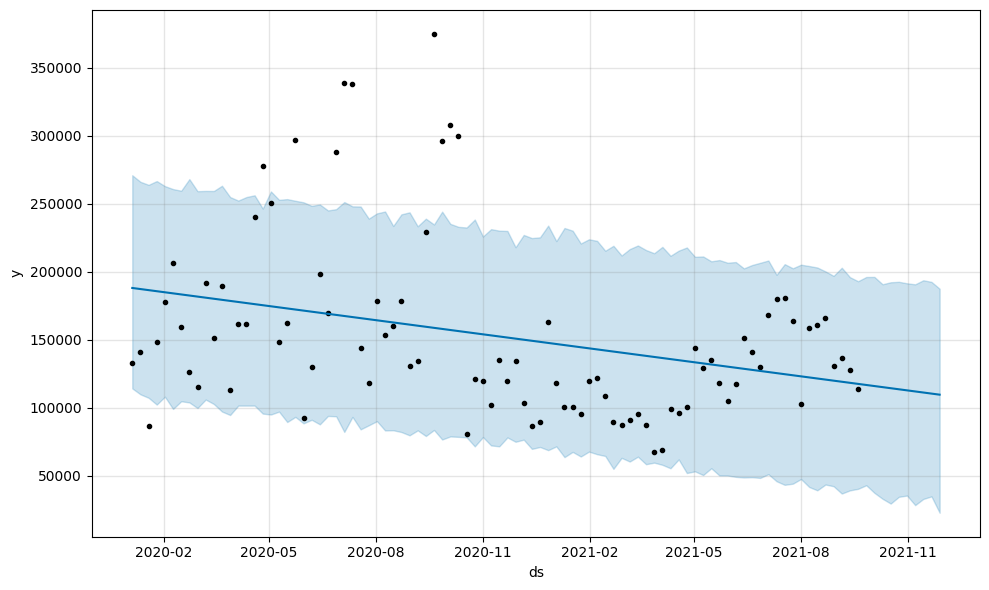

In [ ]:
import matplotlib.pyplot as plt
m.plot(forecast);

<Axes: xlabel='ds'>

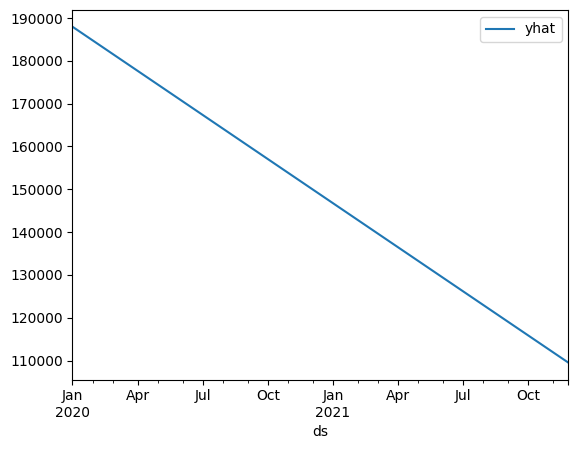

In [ ]:
forecast.plot(x='ds',y='yhat')

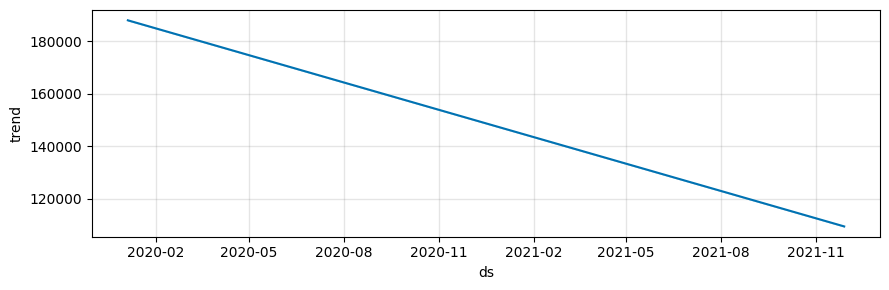

In [ ]:
m.plot_components(forecast);



<Axes: xlabel='ds'>

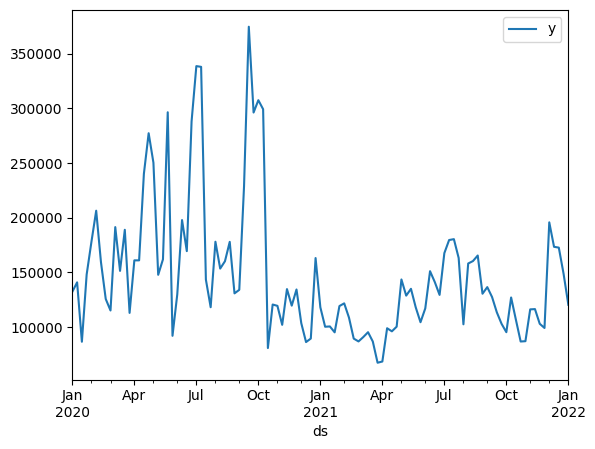

In [ ]:
df.plot(x= 'ds', y = 'y')

<Axes: xlabel='ds'>

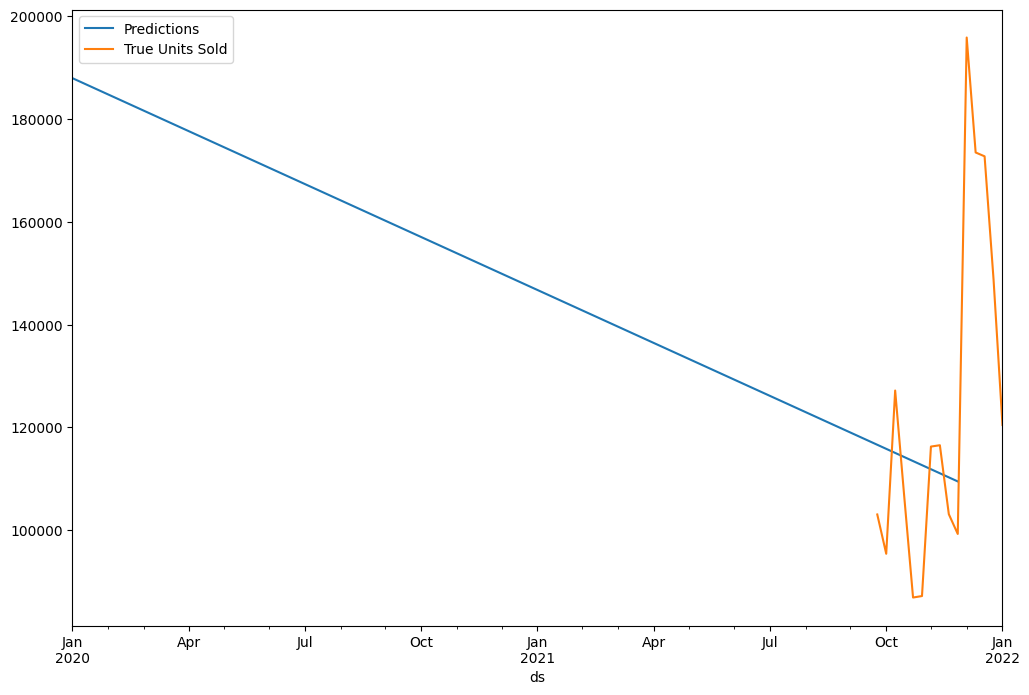

In [ ]:
ax = forecast.plot(x='ds',y='yhat',label='Predictions',legend=True,figsize=(12,8))
test.plot(x='ds',y='y',label='True Units Sold',legend=True,ax=ax)

In [ ]:
from statsmodels.tools.eval_measures import rmse

In [ ]:
predictions = forecast.iloc[90:104]['yhat']

In [ ]:
forecast


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-05,187948.108320,114077.732072,270830.798461,187948.108320,187948.108320,0.0,0.0,0.0,0.0,0.0,0.0,187948.108320
1,2020-01-12,187155.573172,109731.842618,266013.830353,187155.573172,187155.573172,0.0,0.0,0.0,0.0,0.0,0.0,187155.573172
2,2020-01-19,186363.038025,107195.818622,263785.540270,186363.038025,186363.038025,0.0,0.0,0.0,0.0,0.0,0.0,186363.038025
3,2020-01-26,185570.502877,102198.951497,266549.746912,185570.502877,185570.502877,0.0,0.0,0.0,0.0,0.0,0.0,185570.502877
4,2020-02-02,184777.967730,107984.851140,262857.261291,184777.967730,184777.967730,0.0,0.0,0.0,0.0,0.0,0.0,184777.967730
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2021-10-31,112657.269246,35303.440005,191388.310211,112657.268958,112657.269538,0.0,0.0,0.0,0.0,0.0,0.0,112657.269246
96,2021-11-07,111864.734099,28258.118900,190627.035826,111864.733731,111864.734468,0.0,0.0,0.0,0.0,0.0,0.0,111864.734099
97,2021-11-14,111072.198951,32799.471477,193617.893249,111072.198489,111072.199404,0.0,0.0,0.0,0.0,0.0,0.0,111072.198951
98,2021-11-21,110279.663803,34669.832952,192427.863976,110279.663239,110279.664364,0.0,0.0,0.0,0.0,0.0,0.0,110279.663803


In [ ]:
predictions

94    113449.804394
95    112657.269246
96    111864.734099
97    111072.198951
98    110279.663803
99    109487.128655
Name: yhat, dtype: float64

In [ ]:
test['y']

90     103057.761905
91      95413.727273
92     127174.470588
93     106844.526316
94      86897.631579
95      87184.875000
96     116269.208333
97     116530.600000
98     103112.236842
99      99265.588235
100    195862.588235
101    173494.000000
102    172746.058824
103    148833.173913
104    120470.600000
Name: y, dtype: float64

In [ ]:
test['y'].iloc[-1]


120470.6

In [ ]:
rmse(predictions,test['y'].iloc[-1])

9103.318094211663

In [ ]:
test['y'].mean()

123543.80313620408

#Multivariate Forecasting

In [ ]:
original_df

,ds,Retailer ID,Price per Unit,Units Sold,y,Operating Profit,Operating Margin,Region_Midwest,Region_Northeast,Region_South,...,City_Seattle,City_Sioux Falls,City_St. Louis,City_Wichita,City_Wilmington,Product_Men's Street Footwear,Sales Method_In-store,Sales Method_Online,Sales Method_Outlet,y_original
0,2020-01-05,1.157016e+06,37.500000,441.666667,132419.666667,63867.500000,0.493333,0.000000,1.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.166667,0.333333,0.500000,132419.666667
1,2020-01-12,1.157016e+06,37.500000,467.833333,140999.166667,67713.228333,0.495000,0.000000,0.500000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.166667,0.333333,0.500000,140999.166667
2,2020-01-19,1.128299e+06,39.666667,297.333333,86674.000000,35107.633333,0.466667,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.333333,0.666667,86674.000000
3,2020-01-26,1.147443e+06,50.666667,410.888889,148131.555556,68843.031111,0.498889,0.000000,0.333333,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.333333,0.666667,148131.555556
4,2020-02-02,1.157016e+06,48.500000,501.000000,177979.166667,85964.903333,0.530000,0.000000,0.500000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.333333,0.666667,177979.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,2021-12-05,1.187867e+06,58.647059,408.941176,195862.588235,80558.785882,0.464706,0.235294,0.352941,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.176471,0.588235,0.235294,195862.588235
101,2021-12-12,1.177763e+06,57.363636,373.575758,173494.000000,68889.206364,0.458182,0.303030,0.393939,0.000000,...,0.0,0.060606,0.000000,0.060606,0.000000,1.0,0.242424,0.545455,0.212121,173494.000000
102,2021-12-19,1.177732e+06,61.000000,371.117647,172746.058824,67998.155588,0.451471,0.117647,0.441176,0.352941,...,0.0,0.000000,0.058824,0.000000,0.058824,1.0,0.176471,0.500000,0.323529,172746.058824
103,2021-12-26,1.155767e+06,56.869565,341.173913,148833.173913,56425.758261,0.443043,0.000000,0.304348,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.130435,0.521739,0.347826,148833.173913


In [ ]:
original_df.columns

Index(['ds', 'Retailer ID', 'Price per Unit', 'Units Sold', 'y',
       'Operating Profit', 'Operating Margin', 'Region_Midwest',
       'Region_Northeast', 'Region_South',
       ...
       'City_Seattle', 'City_Sioux Falls', 'City_St. Louis', 'City_Wichita',
       'City_Wilmington', 'Product_Men's Street Footwear',
       'Sales Method_In-store', 'Sales Method_Online', 'Sales Method_Outlet',
       'y_original'],
      dtype='object', length=119)

In [ ]:
new_column_names = {
    'Invoice Date': 'ds',
    'Total Sales': 'y'
}
original_df.rename(columns=new_column_names, inplace=True)

original_df['y_original'] = original_df['y'].copy()

In [ ]:
train = original_df[:70]
test = original_df[70:]

In [ ]:
train

,ds,Retailer ID,Price per Unit,Units Sold,y,Operating Profit,Operating Margin,Region_Midwest,Region_Northeast,Region_South,...,City_Seattle,City_Sioux Falls,City_St. Louis,City_Wichita,City_Wilmington,Product_Men's Street Footwear,Sales Method_In-store,Sales Method_Online,Sales Method_Outlet,y_original
0,2020-01-05,1.157016e+06,37.500000,441.666667,132419.666667,63867.500000,0.493333,0.000000,1.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.166667,0.333333,0.500000,132419.666667
1,2020-01-12,1.157016e+06,37.500000,467.833333,140999.166667,67713.228333,0.495000,0.000000,0.500000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.166667,0.333333,0.500000,140999.166667
2,2020-01-19,1.128299e+06,39.666667,297.333333,86674.000000,35107.633333,0.466667,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.333333,0.666667,86674.000000
3,2020-01-26,1.147443e+06,50.666667,410.888889,148131.555556,68843.031111,0.498889,0.000000,0.333333,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.333333,0.666667,148131.555556
4,2020-02-02,1.157016e+06,48.500000,501.000000,177979.166667,85964.903333,0.530000,0.000000,0.500000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.333333,0.666667,177979.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,2021-04-04,1.189362e+06,24.000000,367.600000,68589.700000,26758.810000,0.436000,0.200000,0.300000,0.300000,...,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.200000,0.500000,0.300000,68589.700000
66,2021-04-11,1.184900e+06,33.083333,372.250000,99028.388889,39852.304722,0.450833,0.222222,0.277778,0.083333,...,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.222222,0.527778,0.250000,99028.388889
67,2021-04-18,1.173396e+06,37.888889,332.250000,96200.333333,37725.896667,0.442222,0.222222,0.277778,0.250000,...,0.0,0.055556,0.055556,0.055556,0.055556,1.0,0.194444,0.500000,0.305556,96200.333333
68,2021-04-25,1.172952e+06,39.600000,337.966667,100457.500000,39333.685000,0.444333,0.000000,0.066667,0.300000,...,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.100000,0.500000,0.400000,100457.500000


In [ ]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Columns: 119 entries, ds to y_original
dtypes: datetime64[ns](1), float64(118)
memory usage: 97.7 KB


In [ ]:
original_df.columns

Index(['ds', 'Retailer ID', 'Price per Unit', 'Units Sold', 'y',
       'Operating Profit', 'Operating Margin', 'Region_Midwest',
       'Region_Northeast', 'Region_South',
       ...
       'City_Seattle', 'City_Sioux Falls', 'City_St. Louis', 'City_Wichita',
       'City_Wilmington', 'Product_Men's Street Footwear',
       'Sales Method_In-store', 'Sales Method_Online', 'Sales Method_Outlet',
       'y_original'],
      dtype='object', length=119)

In [ ]:
m1= Prophet()
m1.add_regressor('Sales Method_Online')
m1.add_regressor('Region_Midwest')
m1.add_regressor('Region_Northeast')
m1.add_regressor('Region_South')
m1.add_regressor('Region_Southeast')
m1.add_regressor('Region_West')
m1.fit(train)



2023-08-07 09:24:23,402 - INFO     - Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
2023-08-07 09:24:23,407 - INFO     - Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
2023-08-07 09:24:23,412 - INFO     - Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
09:24:23 - cmdstanpy - INFO - Chain [1] start processing
2023-08-07 09:24:23,452 - INFO     - Chain [1] start processing
09:24:23 - cmdstanpy - INFO - Chain [1] done processing
2023-08-07 09:24:23,701 - INFO     - Chain [1] done processing


In [ ]:
future = m1.make_future_dataframe(periods=7,freq='W')


In [ ]:
m1.component_modes

{'additive': ['Sales Method_Online',
  'Region_Midwest',
  'Region_Northeast',
  'Region_South',
  'Region_Southeast',
  'Region_West',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [ ]:
future['Sales Method_Online'] = 1
future['Region_Northeast'] = 1
future['Region_Midwest'] = 0
future['Region_South'] = 0
future['Region_Southeast'] = 0
future['Region_West'] = 0

In [ ]:
future

,ds,Sales Method_Online,Region_Northeast,Region_Midwest,Region_South,Region_Southeast,Region_West
0,2020-01-05,1,1,0,0,0,0
1,2020-01-12,1,1,0,0,0,0
2,2020-01-19,1,1,0,0,0,0
3,2020-01-26,1,1,0,0,0,0
4,2020-02-02,1,1,0,0,0,0
...,...,...,...,...,...,...,...
72,2021-05-23,1,1,0,0,0,0
73,2021-05-30,1,1,0,0,0,0
74,2021-06-06,1,1,0,0,0,0
75,2021-06-13,1,1,0,0,0,0


In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-05,187948.108320,114077.732072,270830.798461,187948.108320,187948.108320,0.0,0.0,0.0,0.0,0.0,0.0,187948.108320
1,2020-01-12,187155.573172,109731.842618,266013.830353,187155.573172,187155.573172,0.0,0.0,0.0,0.0,0.0,0.0,187155.573172
2,2020-01-19,186363.038025,107195.818622,263785.540270,186363.038025,186363.038025,0.0,0.0,0.0,0.0,0.0,0.0,186363.038025
3,2020-01-26,185570.502877,102198.951497,266549.746912,185570.502877,185570.502877,0.0,0.0,0.0,0.0,0.0,0.0,185570.502877
4,2020-02-02,184777.967730,107984.851140,262857.261291,184777.967730,184777.967730,0.0,0.0,0.0,0.0,0.0,0.0,184777.967730
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2021-10-31,112657.269246,35303.440005,191388.310211,112657.268958,112657.269538,0.0,0.0,0.0,0.0,0.0,0.0,112657.269246
96,2021-11-07,111864.734099,28258.118900,190627.035826,111864.733731,111864.734468,0.0,0.0,0.0,0.0,0.0,0.0,111864.734099
97,2021-11-14,111072.198951,32799.471477,193617.893249,111072.198489,111072.199404,0.0,0.0,0.0,0.0,0.0,0.0,111072.198951
98,2021-11-21,110279.663803,34669.832952,192427.863976,110279.663239,110279.664364,0.0,0.0,0.0,0.0,0.0,0.0,110279.663803


In [ ]:
forecast2 = m1.predict(future)

In [ ]:
test

,ds,Retailer ID,Price per Unit,Units Sold,y,Operating Profit,Operating Margin,Region_Midwest,Region_Northeast,Region_South,...,City_Seattle,City_Sioux Falls,City_St. Louis,City_Wichita,City_Wilmington,Product_Men's Street Footwear,Sales Method_In-store,Sales Method_Online,Sales Method_Outlet,y_original
70,2021-05-09,1.189772e+06,42.533333,383.766667,128849.333333,51240.179667,0.450333,0.200000,0.333333,0.200000,...,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.200000,0.500000,0.300000,128849.333333
71,2021-05-16,1.179938e+06,47.459459,365.756757,135091.891892,54315.848919,0.450541,0.270270,0.216216,0.162162,...,0.0,0.054054,0.000000,0.054054,0.054054,1.0,0.216216,0.513514,0.270270,135091.891892
72,2021-05-23,1.177355e+06,45.774194,334.870968,118119.225806,45910.725806,0.443871,0.064516,0.225806,0.387097,...,0.0,0.000000,0.064516,0.000000,0.000000,1.0,0.161290,0.483871,0.354839,118119.225806
73,2021-05-30,1.145915e+06,44.764706,317.588235,104538.882353,38884.069412,0.420588,0.117647,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.117647,0.470588,0.411765,104538.882353
74,2021-06-06,1.187642e+06,41.315789,353.421053,117141.631579,44343.478947,0.435263,0.421053,0.157895,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.157895,0.526316,0.315789,117141.631579
75,2021-06-13,1.177286e+06,46.264706,392.823529,151198.205882,60713.364706,0.452941,0.352941,0.294118,0.000000,...,0.0,0.058824,0.000000,0.000000,0.000000,1.0,0.235294,0.558824,0.205882,151198.205882
76,2021-06-20,1.175397e+06,47.806452,374.032258,141222.870968,54644.940000,0.441935,0.387097,0.322581,0.193548,...,0.0,0.000000,0.064516,0.064516,0.064516,1.0,0.193548,0.516129,0.290323,141222.870968
77,2021-06-27,1.163710e+06,46.071429,361.428571,129509.571429,48583.222143,0.429643,0.142857,0.071429,0.214286,...,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.107143,0.571429,0.321429,129509.571429
78,2021-07-04,1.185732e+06,50.272727,396.090909,167717.818182,65081.744545,0.444545,0.545455,0.272727,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.181818,0.545455,0.272727,167717.818182
79,2021-07-11,1.183550e+06,50.750000,424.777778,179695.027778,71086.483056,0.448611,0.388889,0.277778,0.000000,...,0.0,0.055556,0.000000,0.000000,0.000000,1.0,0.250000,0.555556,0.194444,179695.027778


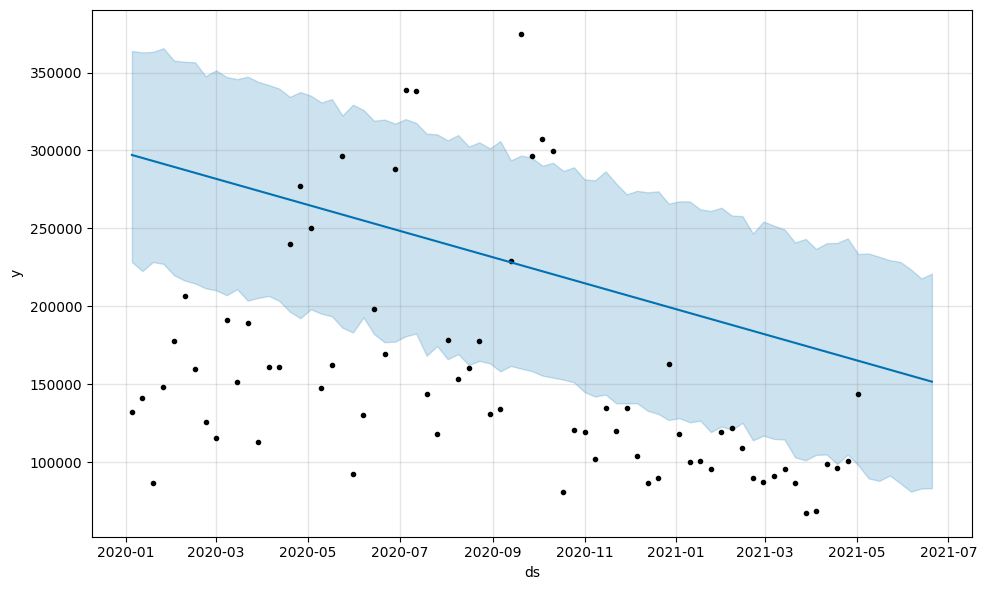

In [ ]:
m1.plot(forecast2);